1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

1. Познакомьтесь с данными.

In [2]:
df = pd.read_csv('air_data.csv', sep=';')

In [3]:
df

ISSUE_DATE      FLIGHT_DATE_LOC PAX_TYPE  REVENUE_AMOUNT  \
0      2021-12-07 00:00:00  2022-01-11 00:00:00       AD             200   
1      2021-12-31 00:00:00  2022-01-03 00:00:00       AD             610   
2      2021-11-28 00:00:00  2022-01-04 00:00:00       AD             390   
3      2021-12-08 00:00:00  2022-01-05 00:00:00       AD             190   
4      2021-12-08 00:00:00  2022-01-12 00:00:00       AD             190   
...                    ...                  ...      ...             ...   
49995  2022-06-11 00:00:00  2022-06-22 00:00:00      CHD             480   
49996  2022-06-06 00:00:00  2022-06-20 00:00:00       AD             270   
49997  2022-06-26 00:00:00  2022-06-29 00:00:00       AD             230   
49998  2022-06-26 00:00:00  2022-06-28 00:00:00       AD             270   
49999  2022-06-09 00:00:00  2022-06-25 00:00:00       AD             260   

      ORIG_CITY_CODE DEST_CITY_CODE ROUTE_FLIGHT_TYPE FFP_FLAG SALE_TYPE  
0                MOW            KGD               ВВЛ      NaN    ONLINE  
1                UUS            OVB               ВВЛ      NaN   OFFLINE  
2                KGD            MOW               ВВЛ      FFP    ONLINE  
3                VOZ            MOW               ВВЛ      NaN    ONLINE  
4                MOW            KRR               ВВЛ      FFP   OFFLINE  
...              ...            ...               ...      ...       ...  
49995            MOW            OMS               ВВЛ      NaN    ONLINE  
49996            LED            MOW               ВВЛ      NaN   OFFLINE  
49997            MOW            KZN               ВВЛ      FFP    ONLINE  
49998            KZN            MOW               ВВЛ      NaN   OFFLINE  
49999            AER            MOW               ВВЛ      FFP    ONLINE  

[50000 rows x 9 columns]

In [4]:
df.shape

(50000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


<div class="alert alert-block alert-success">
    <b>Вывод:</b> <br>
1. В датасете 5000 строк, 9 столбцов.<br>
2. В столбцах 'ORIG_CITY_CODE', 'DEST_CITY_CODE', 'FFP_FLAG' есть пропуски<br>
3. В столбцах 'ISSUE_DATE' и 'FLIGHT_DATE_LOC' указан неправильный тип данных (указан object вместо datetime64)

2. Осуществите предобработку данных.

    2.1 Приведите заголовки к удобному виду.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df

issue_date      flight_date_loc pax_type  revenue_amount  \
0      2021-12-07 00:00:00  2022-01-11 00:00:00       AD             200   
1      2021-12-31 00:00:00  2022-01-03 00:00:00       AD             610   
2      2021-11-28 00:00:00  2022-01-04 00:00:00       AD             390   
3      2021-12-08 00:00:00  2022-01-05 00:00:00       AD             190   
4      2021-12-08 00:00:00  2022-01-12 00:00:00       AD             190   
...                    ...                  ...      ...             ...   
49995  2022-06-11 00:00:00  2022-06-22 00:00:00      CHD             480   
49996  2022-06-06 00:00:00  2022-06-20 00:00:00       AD             270   
49997  2022-06-26 00:00:00  2022-06-29 00:00:00       AD             230   
49998  2022-06-26 00:00:00  2022-06-28 00:00:00       AD             270   
49999  2022-06-09 00:00:00  2022-06-25 00:00:00       AD             260   

      orig_city_code dest_city_code route_flight_type ffp_flag sale_type  
0                MOW            KGD               ВВЛ      NaN    ONLINE  
1                UUS            OVB               ВВЛ      NaN   OFFLINE  
2                KGD            MOW               ВВЛ      FFP    ONLINE  
3                VOZ            MOW               ВВЛ      NaN    ONLINE  
4                MOW            KRR               ВВЛ      FFP   OFFLINE  
...              ...            ...               ...      ...       ...  
49995            MOW            OMS               ВВЛ      NaN    ONLINE  
49996            LED            MOW               ВВЛ      NaN   OFFLINE  
49997            MOW            KZN               ВВЛ      FFP    ONLINE  
49998            KZN            MOW               ВВЛ      NaN   OFFLINE  
49999            AER            MOW               ВВЛ      FFP    ONLINE  

[50000 rows x 9 columns]

    2.2 Проверьте типы данных.

In [8]:
df.dtypes

issue_date           object
flight_date_loc      object
pax_type             object
revenue_amount        int64
orig_city_code       object
dest_city_code       object
route_flight_type    object
ffp_flag             object
sale_type            object
dtype: object

В столбцах 'issue_date' и 'flight_date_loc' указан неправильный тип данных (указан object вместо datetime64)

In [9]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%Y-%m-%d %H:%M:%S')

In [10]:
df['flight_date_loc'] = pd.to_datetime(df['flight_date_loc'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df.dtypes

issue_date           datetime64[ns]
flight_date_loc      datetime64[ns]
pax_type                     object
revenue_amount                int64
orig_city_code               object
dest_city_code               object
route_flight_type            object
ffp_flag                     object
sale_type                    object
dtype: object

In [12]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49995 2022-06-11      2022-06-22      CHD             480            MOW   
49996 2022-06-06      2022-06-20       AD             270            LED   
49997 2022-06-26      2022-06-29       AD             230            MOW   
49998 2022-06-26      2022-06-28       AD             270            KZN   
49999 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type ffp_flag sale_type  
0                KGD               ВВЛ      NaN    ONLINE  
1                OVB               ВВЛ      NaN   OFFLINE  
2                MOW               ВВЛ      FFP    ONLINE  
3                MOW               ВВЛ      NaN    ONLINE  
4                KRR               ВВЛ      FFP   OFFLINE  
...              ...               ...      ...       ...  
49995            OMS               ВВЛ      NaN    ONLINE  
49996            MOW               ВВЛ      NaN   OFFLINE  
49997            KZN               ВВЛ      FFP    ONLINE  
49998            MOW               ВВЛ      NaN   OFFLINE  
49999            MOW               ВВЛ      FFP    ONLINE  

[50000 rows x 9 columns]

    2.3 Обработайте пропуски.

In [13]:
df.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [14]:
df[df['orig_city_code'].isna()]

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
2020 2022-02-17      2022-03-22       AD             440            NaN   
8100 2022-05-02      2022-05-11       AD             440            NaN   

     dest_city_code route_flight_type ffp_flag sale_type  
2020            KHV               МВЛ      NaN    ONLINE  
8100            KHV               МВЛ      NaN   OFFLINE

In [15]:
# В данных строках неизвестен город отправления. Так как в датасете 50000 строк, то можем просто удалить эти строки
df = df[~df['orig_city_code'].isna()].reset_index(drop=True)

In [16]:
df[df['dest_city_code'].isna()]

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
47580 2022-05-13      2022-07-28       AD             440            KHV   

      dest_city_code route_flight_type ffp_flag sale_type  
47580            NaN               МВЛ      NaN   OFFLINE

In [17]:
# В данной строке неизвестен город назначения. Так как в датасете 50000 строк, то можем просто удалить эту строку
df = df[~df['dest_city_code'].isna()].reset_index(drop=True)

In [18]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49992 2022-06-11      2022-06-22      CHD             480            MOW   
49993 2022-06-06      2022-06-20       AD             270            LED   
49994 2022-06-26      2022-06-29       AD             230            MOW   
49995 2022-06-26      2022-06-28       AD             270            KZN   
49996 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type ffp_flag sale_type  
0                KGD               ВВЛ      NaN    ONLINE  
1                OVB               ВВЛ      NaN   OFFLINE  
2                MOW               ВВЛ      FFP    ONLINE  
3                MOW               ВВЛ      NaN    ONLINE  
4                KRR               ВВЛ      FFP   OFFLINE  
...              ...               ...      ...       ...  
49992            OMS               ВВЛ      NaN    ONLINE  
49993            MOW               ВВЛ      NaN   OFFLINE  
49994            KZN               ВВЛ      FFP    ONLINE  
49995            MOW               ВВЛ      NaN   OFFLINE  
49996            MOW               ВВЛ      FFP    ONLINE  

[49997 rows x 9 columns]

In [19]:
# Пропуски в столбце 'ffp_flag' (наличие программы лояльности) связаны с тем, что программа лояльности по данной записи в датасете отсутствует
# Поэтому заполним пропуски в данном столбце 0
df['ffp_flag'] = df['ffp_flag'].fillna(0)

In [20]:
# Также наличие программы лояльности FFP заменим на 1. Это может пригодиться для дальнейшего исследования
df['ffp_flag'] = df['ffp_flag'].replace('FFP', 1)

In [21]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49992 2022-06-11      2022-06-22      CHD             480            MOW   
49993 2022-06-06      2022-06-20       AD             270            LED   
49994 2022-06-26      2022-06-29       AD             230            MOW   
49995 2022-06-26      2022-06-28       AD             270            KZN   
49996 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
49992            OMS               ВВЛ         0    ONLINE  
49993            MOW               ВВЛ         0   OFFLINE  
49994            KZN               ВВЛ         1    ONLINE  
49995            MOW               ВВЛ         0   OFFLINE  
49996            MOW               ВВЛ         1    ONLINE  

[49997 rows x 9 columns]

In [22]:
df.dtypes

issue_date           datetime64[ns]
flight_date_loc      datetime64[ns]
pax_type                     object
revenue_amount                int64
orig_city_code               object
dest_city_code               object
route_flight_type            object
ffp_flag                      int64
sale_type                    object
dtype: object

In [23]:
df.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

    2.4 Проверьте наличие дубликатов.

In [24]:
df.duplicated().sum()

169

In [25]:
# Удаляем
df = df.drop_duplicates().reset_index(drop=True)

In [26]:
df.duplicated().sum()

0

    2.5 Исключите нулевые значения в выручке для дальнейшего исследования.

In [27]:
df[df['revenue_amount']==0]

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
13    2021-12-05      2022-01-16      INF               0            PEZ   
32    2021-12-08      2022-01-11      INF               0            UFA   
106   2021-12-05      2022-01-08      INF               0            MOW   
228   2021-12-04      2022-01-07      INF               0            MOW   
288   2021-10-26      2021-11-02      INF               0            MOW   
...          ...             ...      ...             ...            ...   
49213 2022-04-09      2022-05-01      INF               0            OVB   
49248 2022-04-01      2022-05-17      INF               0            MOW   
49312 2021-12-16      2021-12-16       AD               0            OVB   
49519 2022-04-15      2022-05-15      INF               0            NYM   
49709 2022-04-25      2022-05-16      INF               0            MRV   

      dest_city_code route_flight_type  ffp_flag sale_type  
13               MOW               ВВЛ         0   OFFLINE  
32               MOW               ВВЛ         0    ONLINE  
106              UFA               ВВЛ         0    ONLINE  
228              AER               ВВЛ         0    ONLINE  
288              PEZ               ВВЛ         0    ONLINE  
...              ...               ...       ...       ...  
49213            AER               ВВЛ         0    ONLINE  
49248            KZN               ВВЛ         0    ONLINE  
49312            MOW               ВВЛ         0   OFFLINE  
49519            MOW               ВВЛ         0   OFFLINE  
49709            OVB               ВВЛ         0    ONLINE  

[466 rows x 9 columns]

In [28]:
df = df[df['revenue_amount']!=0].reset_index(drop=True)

In [29]:
df.shape

(49362, 9)

In [30]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49357 2022-06-11      2022-06-22      CHD             480            MOW   
49358 2022-06-06      2022-06-20       AD             270            LED   
49359 2022-06-26      2022-06-29       AD             230            MOW   
49360 2022-06-26      2022-06-28       AD             270            KZN   
49361 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
49357            OMS               ВВЛ         0    ONLINE  
49358            MOW               ВВЛ         0   OFFLINE  
49359            KZN               ВВЛ         1    ONLINE  
49360            MOW               ВВЛ         0   OFFLINE  
49361            MOW               ВВЛ         1    ONLINE  

[49362 rows x 9 columns]

<div class="alert alert-block alert-success">
    <b>Вывод:</b> <br>
    1. Заголовки столбцов переведены в нижний регистр<br>
    2. Исправлен тип данных в столбцах 'issue_date' и 'flight_date_loc'<br>
    3. Пропуски в столбце 'ffp_flag' (наличие программы лояльности) связаны с тем, что программа лояльности по данной записи в датасете отсутствует, поэтому заполнили пропуски в данном столбце нулём. Остальные строки с пропусками в связи с их малочисленностью были удалены<br>
    4. Найдены и удалены дубликаты (169 дубликатов)<br>
    5. Исключены нулевые значения в выручке для дальнейшего исследования.

3. Исследовательский анализ данных:

- 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.

In [31]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49357 2022-06-11      2022-06-22      CHD             480            MOW   
49358 2022-06-06      2022-06-20       AD             270            LED   
49359 2022-06-26      2022-06-29       AD             230            MOW   
49360 2022-06-26      2022-06-28       AD             270            KZN   
49361 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
49357            OMS               ВВЛ         0    ONLINE  
49358            MOW               ВВЛ         0   OFFLINE  
49359            KZN               ВВЛ         1    ONLINE  
49360            MOW               ВВЛ         0   OFFLINE  
49361            MOW               ВВЛ         1    ONLINE  

[49362 rows x 9 columns]

Выручка по дням:

In [32]:
revenue_dynamics = df.groupby('issue_date')['revenue_amount'].sum()
revenue_dynamics.reset_index()

issue_date  revenue_amount
0   2021-10-01           60310
1   2021-10-02           33100
2   2021-10-03           34320
3   2021-10-04           58190
4   2021-10-05           60800
..         ...             ...
360 2022-09-26           39520
361 2022-09-27           48350
362 2022-09-28           44860
363 2022-09-29           27460
364 2022-09-30           25980

[365 rows x 2 columns]

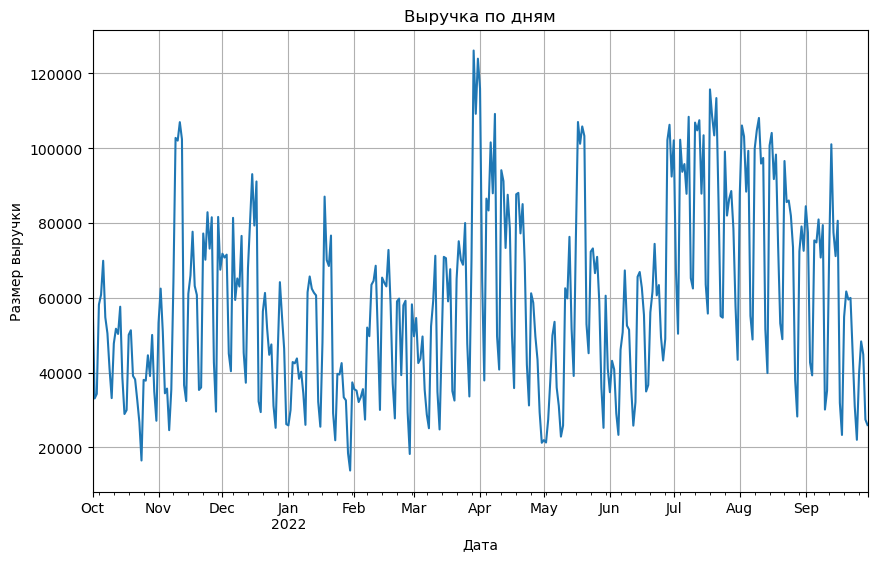

In [33]:
revenue_dynamics.plot(
           grid=True,
           figsize=(10,6),
           title='Выручка по дням',
           xlabel='Дата',
           ylabel='Размер выручки',
           legend=False)

plt.show()

Видно, что выручка всё время колеблется

In [34]:
# Это нужно для того, чтобы сводные таблицы (датафреймы) выводились через цикл в формате таблицы HTML (чтобы было нагляднее)
from IPython.display import display

ffp_flag        0      1
issue_date              
2021-10-01  38160  22150
2021-10-02  21020  12080
2021-10-03  18750  15570
2021-10-04  33330  24860
2021-10-05  33250  27550
...           ...    ...
2022-09-26  30020   9500
2022-09-27  37650  10700
2022-09-28  28150  16710
2022-09-29  21970   5490
2022-09-30  23340   2640

[365 rows x 2 columns]

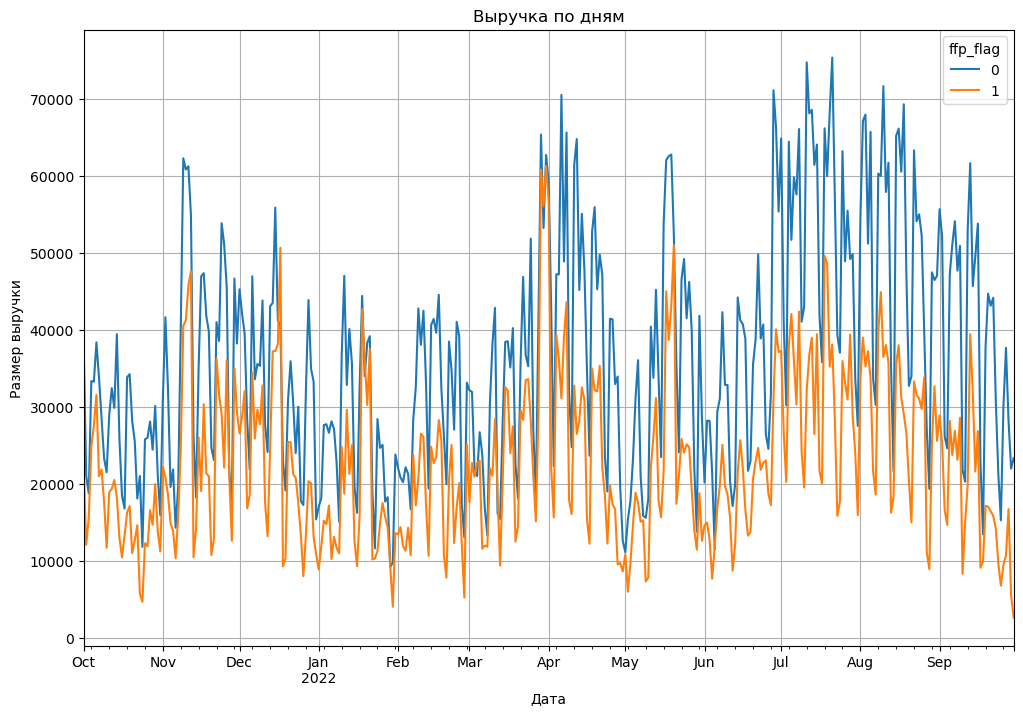

route_flight_type      ВВЛ      МВЛ
issue_date                         
2021-10-01         45710.0  14600.0
2021-10-02         26730.0   6370.0
2021-10-03         25940.0   8380.0
2021-10-04         48310.0   9880.0
2021-10-05         47580.0  13220.0
...                    ...      ...
2022-09-26         36200.0   3320.0
2022-09-27         41900.0   6450.0
2022-09-28         31430.0  13430.0
2022-09-29         22240.0   5220.0
2022-09-30         18980.0   7000.0

[365 rows x 2 columns]

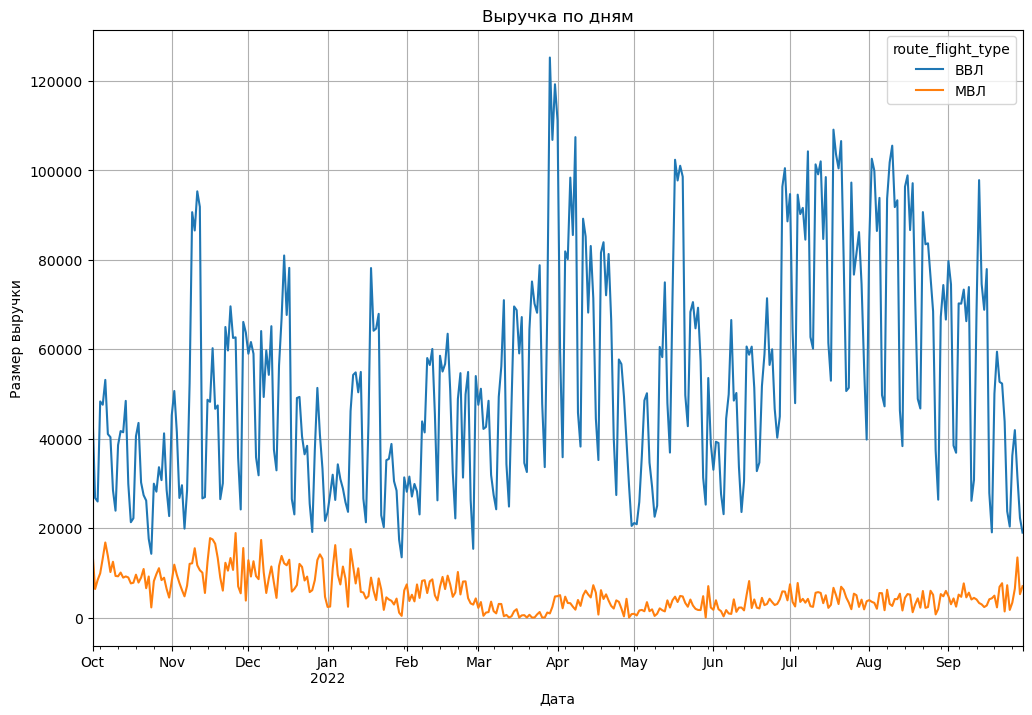

sale_type   OFFLINE  ONLINE
issue_date                 
2021-10-01    31530   28780
2021-10-02    16180   16920
2021-10-03     8270   26050
2021-10-04    26390   31800
2021-10-05    26910   33890
...             ...     ...
2022-09-26    22290   17230
2022-09-27    27080   21270
2022-09-28    25930   18930
2022-09-29    18880    8580
2022-09-30    18160    7820

[365 rows x 2 columns]

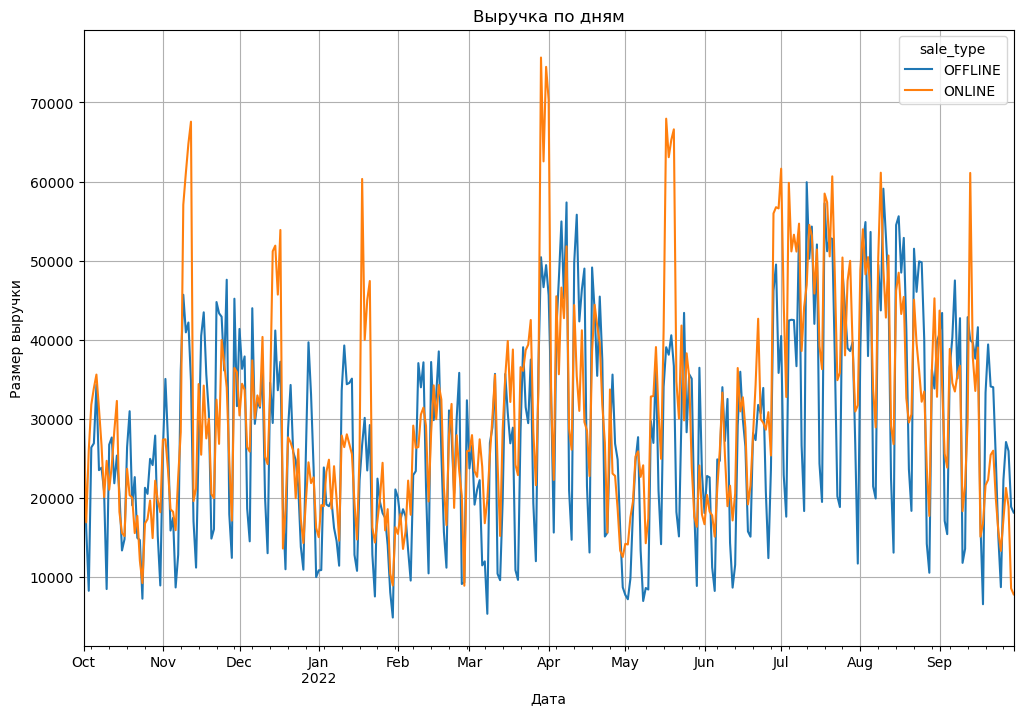

In [35]:
for element in ['ffp_flag', 'route_flight_type', 'sale_type']:
    revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=element,
                                     aggfunc='sum',
                                     values='revenue_amount')
    revenue_dynamics = revenue_dynamics.fillna(0) # т.к. в некоторые дни могло не быть вообще покупок билетов с элементом из element
    display(revenue_dynamics) # вот тут и используем этот display
    revenue_dynamics.plot(
           grid=True,
           figsize=(12,8),
           title='Выручка по дням',
           xlabel='Дата',
           ylabel='Размер выручки')
    plt.show() # добавляя plt.show(), мы получаем каждый график непосредственно под своей таблицей

Вывод:
1. суммарная выручка по дням почти всегда больше по продажам без программы лояльности, чем по продажам с программой лояльности (это обусловлено тем, что продаж без программ с лояльностью в принципе больше)
2. суммарная выручка по дням всегда больше по типам перелёта ВВЛ, чем по типам перелёта МВЛ (это также обусловлено тем, что продаж с типом перелёта ВВЛ в принципе больше)
3. о выручке по способу покупки (онлайн или оффлайн) сложно судить по графику, в разные дни по-разному

Посмотрим на общую таблицу выручки с одновременной детализацией

In [36]:
revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=['ffp_flag', 'route_flight_type', 'sale_type'],
                                     aggfunc='sum',
                                     values='revenue_amount',
                                     margins=True)
revenue_dynamics

ffp_flag                     0                                          1  \
route_flight_type          ВВЛ                   МВЛ                  ВВЛ   
sale_type              OFFLINE     ONLINE    OFFLINE    ONLINE    OFFLINE   
issue_date                                                                  
2021-10-01 00:00:00    16480.0    10510.0     7200.0    3970.0     7300.0   
2021-10-02 00:00:00     8100.0     7560.0     3290.0    2070.0     3780.0   
2021-10-03 00:00:00     3660.0     9580.0     2850.0    2660.0     1760.0   
2021-10-04 00:00:00    14910.0    10790.0     3830.0    3800.0     5940.0   
2021-10-05 00:00:00    12250.0    11120.0     6990.0    2890.0     7670.0   
...                        ...        ...        ...       ...        ...   
2022-09-27 00:00:00    23980.0     7220.0     1000.0    5450.0     2100.0   
2022-09-28 00:00:00    13190.0     6110.0     3990.0    4860.0     4750.0   
2022-09-29 00:00:00    12150.0     4600.0     4770.0     450.0     1960.0   
2022-09-30 00:00:00    13990.0     2500.0     4170.0    2680.0        NaN   
All                  6829650.0  4815440.0  1179840.0  555050.0  2251330.0   

ffp_flag                                                All  
route_flight_type                   МВЛ                      
sale_type               ONLINE  OFFLINE    ONLINE            
issue_date                                                   
2021-10-01 00:00:00    11420.0    550.0    2880.0     60310  
2021-10-02 00:00:00     7290.0   1010.0       NaN     33100  
2021-10-03 00:00:00    10940.0      NaN    2870.0     34320  
2021-10-04 00:00:00    16670.0   1710.0     540.0     58190  
2021-10-05 00:00:00    16540.0      NaN    3340.0     60800  
...                        ...      ...       ...       ...  
2022-09-27 00:00:00     8600.0      NaN       NaN     48350  
2022-09-28 00:00:00     7380.0   4000.0     580.0     44860  
2022-09-29 00:00:00     3530.0      NaN       NaN     27460  
2022-09-30 00:00:00     2490.0      NaN     150.0     25980  
All                  5714060.0  56080.0  200920.0  21602370  

[366 rows x 9 columns]

Повторим то же самое, но без вывода итогов (margins), это нужно для дальнейшего построения графиков

In [37]:
revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=['ffp_flag', 'route_flight_type', 'sale_type'],
                                     aggfunc='sum',
                                     values='revenue_amount')
revenue_dynamics

ffp_flag                 0                                1                   \
route_flight_type      ВВЛ              МВЛ             ВВЛ              МВЛ   
sale_type          OFFLINE   ONLINE OFFLINE  ONLINE OFFLINE   ONLINE OFFLINE   
issue_date                                                                     
2021-10-01         16480.0  10510.0  7200.0  3970.0  7300.0  11420.0   550.0   
2021-10-02          8100.0   7560.0  3290.0  2070.0  3780.0   7290.0  1010.0   
2021-10-03          3660.0   9580.0  2850.0  2660.0  1760.0  10940.0     NaN   
2021-10-04         14910.0  10790.0  3830.0  3800.0  5940.0  16670.0  1710.0   
2021-10-05         12250.0  11120.0  6990.0  2890.0  7670.0  16540.0     NaN   
...                    ...      ...     ...     ...     ...      ...     ...   
2022-09-26         19260.0   7440.0     NaN  3320.0  3030.0   6470.0     NaN   
2022-09-27         23980.0   7220.0  1000.0  5450.0  2100.0   8600.0     NaN   
2022-09-28         13190.0   6110.0  3990.0  4860.0  4750.0   7380.0  4000.0   
2022-09-29         12150.0   4600.0  4770.0   450.0  1960.0   3530.0     NaN   
2022-09-30         13990.0   2500.0  4170.0  2680.0     NaN   2490.0     NaN   

ffp_flag                   
route_flight_type          
sale_type          ONLINE  
issue_date                 
2021-10-01         2880.0  
2021-10-02            NaN  
2021-10-03         2870.0  
2021-10-04          540.0  
2021-10-05         3340.0  
...                   ...  
2022-09-26            NaN  
2022-09-27            NaN  
2022-09-28          580.0  
2022-09-29            NaN  
2022-09-30          150.0  

[365 rows x 8 columns]

In [38]:
revenue_dynamics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-10-01 to 2022-09-30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (0, ВВЛ, OFFLINE)  365 non-null    float64
 1   (0, ВВЛ, ONLINE)   365 non-null    float64
 2   (0, МВЛ, OFFLINE)  335 non-null    float64
 3   (0, МВЛ, ONLINE)   327 non-null    float64
 4   (1, ВВЛ, OFFLINE)  362 non-null    float64
 5   (1, ВВЛ, ONLINE)   365 non-null    float64
 6   (1, МВЛ, OFFLINE)  67 non-null     float64
 7   (1, МВЛ, ONLINE)   194 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


Заполним пропуски нулями: по соответствующим критериям (детализации) не было перелётов, а значит, не было и выручки

In [39]:
revenue_dynamics = revenue_dynamics.fillna(0)
revenue_dynamics

ffp_flag                 0                                1                   \
route_flight_type      ВВЛ              МВЛ             ВВЛ              МВЛ   
sale_type          OFFLINE   ONLINE OFFLINE  ONLINE OFFLINE   ONLINE OFFLINE   
issue_date                                                                     
2021-10-01         16480.0  10510.0  7200.0  3970.0  7300.0  11420.0   550.0   
2021-10-02          8100.0   7560.0  3290.0  2070.0  3780.0   7290.0  1010.0   
2021-10-03          3660.0   9580.0  2850.0  2660.0  1760.0  10940.0     0.0   
2021-10-04         14910.0  10790.0  3830.0  3800.0  5940.0  16670.0  1710.0   
2021-10-05         12250.0  11120.0  6990.0  2890.0  7670.0  16540.0     0.0   
...                    ...      ...     ...     ...     ...      ...     ...   
2022-09-26         19260.0   7440.0     0.0  3320.0  3030.0   6470.0     0.0   
2022-09-27         23980.0   7220.0  1000.0  5450.0  2100.0   8600.0     0.0   
2022-09-28         13190.0   6110.0  3990.0  4860.0  4750.0   7380.0  4000.0   
2022-09-29         12150.0   4600.0  4770.0   450.0  1960.0   3530.0     0.0   
2022-09-30         13990.0   2500.0  4170.0  2680.0     0.0   2490.0     0.0   

ffp_flag                   
route_flight_type          
sale_type          ONLINE  
issue_date                 
2021-10-01         2880.0  
2021-10-02            0.0  
2021-10-03         2870.0  
2021-10-04          540.0  
2021-10-05         3340.0  
...                   ...  
2022-09-26            0.0  
2022-09-27            0.0  
2022-09-28          580.0  
2022-09-29            0.0  
2022-09-30          150.0  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Выручка по дням'}, xlabel='Дата', ylabel='Размер выручки'>

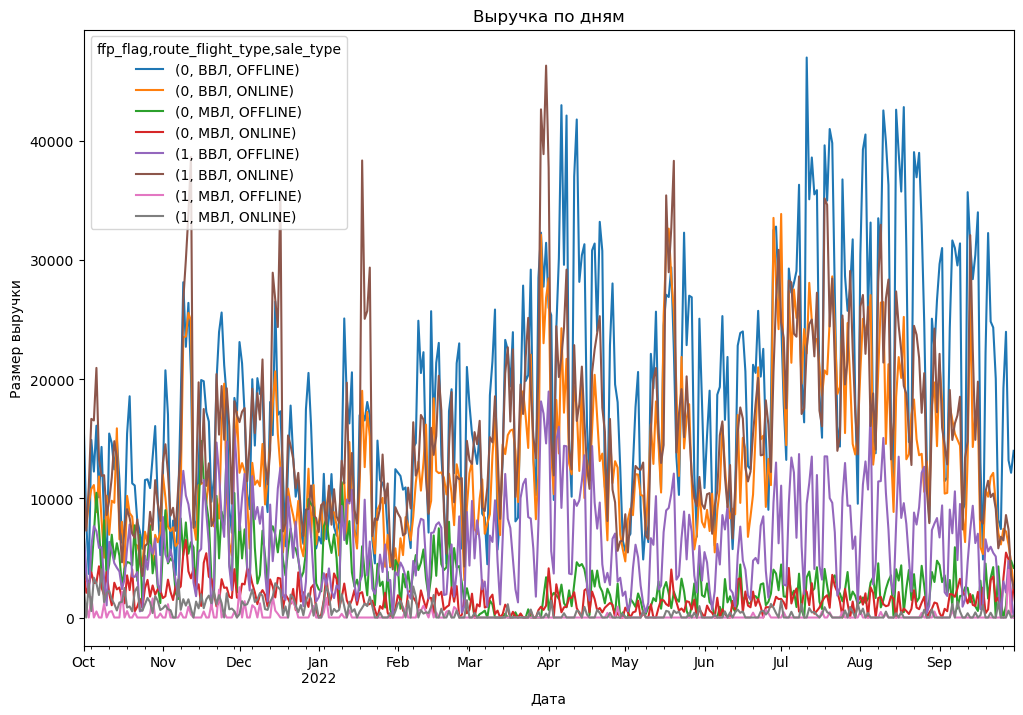

In [40]:
revenue_dynamics.plot(figsize=(12,8), 
           title='Выручка по дням',
           xlabel='Дата',
           ylabel='Размер выручки')

Не очень понятный график, лучше по отдельности рассматривать

<AxesSubplot:title={'center':'Выручка по дням'}, xlabel='Дата', ylabel='Размер выручки'>

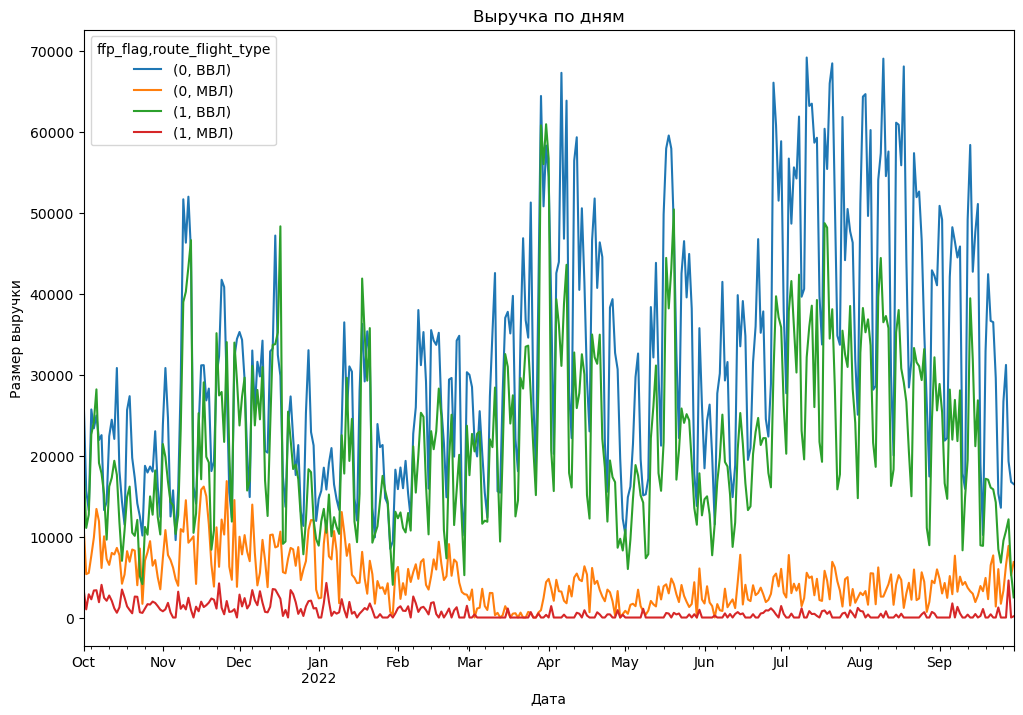

In [41]:
revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=['ffp_flag', 'route_flight_type'],
                                     aggfunc='sum',
                                     values='revenue_amount')
revenue_dynamics = revenue_dynamics.fillna(0)
revenue_dynamics.plot(figsize=(12,8),
           title='Выручка по дням',
           xlabel='Дата',
           ylabel='Размер выручки')

<AxesSubplot:title={'center':'Выручка по дням'}, xlabel='Дата', ylabel='Размер выручки'>

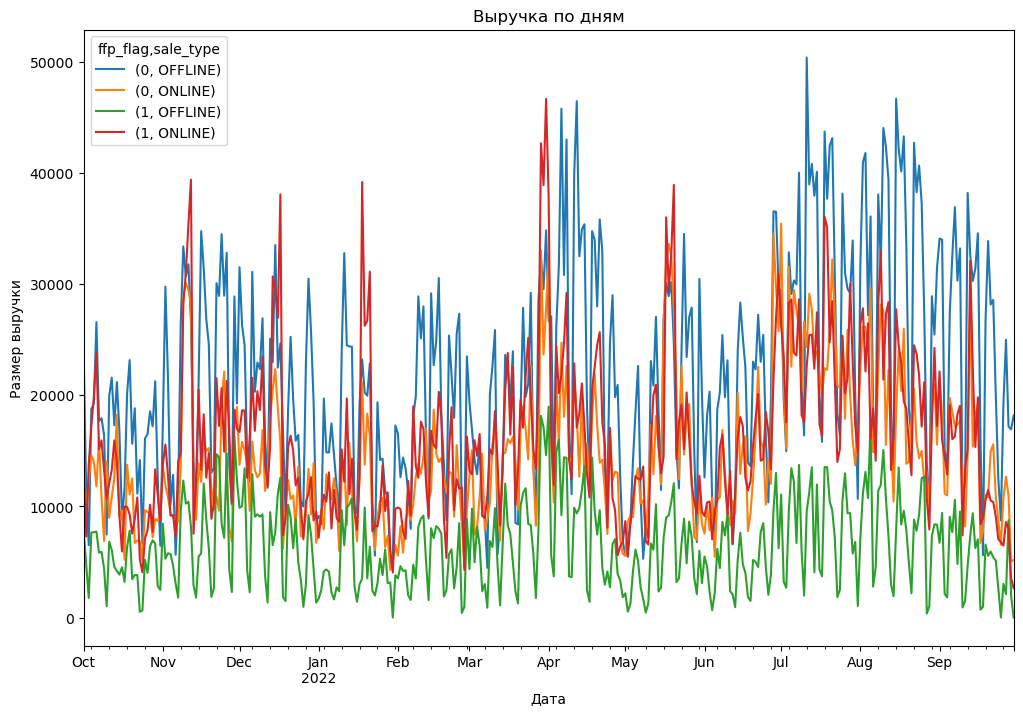

In [42]:
revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=['ffp_flag', 'sale_type'],
                                     aggfunc='sum',
                                     values='revenue_amount')
revenue_dynamics = revenue_dynamics.fillna(0)
revenue_dynamics.plot(figsize=(12,8),
           title='Выручка по дням',
           xlabel='Дата',
           ylabel='Размер выручки')

<AxesSubplot:xlabel='issue_date'>

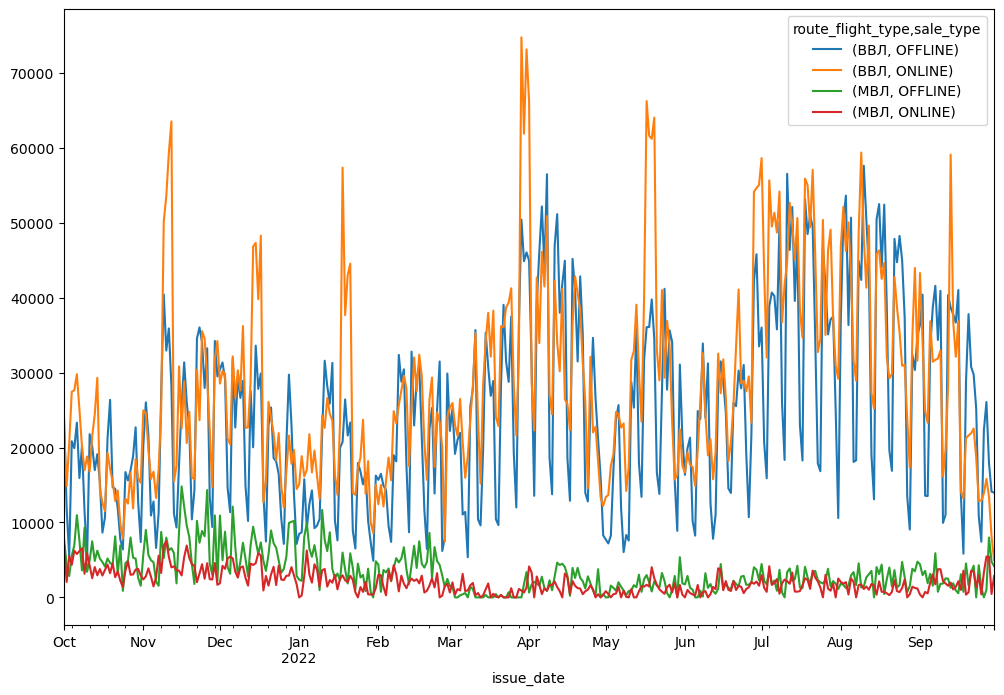

In [43]:
revenue_dynamics = df.pivot_table(index='issue_date',
                                     columns=['route_flight_type', 'sale_type'],
                                     aggfunc='sum',
                                     values='revenue_amount')
revenue_dynamics = revenue_dynamics.fillna(0)
revenue_dynamics.plot(figsize=(12,8))

Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет.

In [44]:
df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
49357 2022-06-11      2022-06-22      CHD             480            MOW   
49358 2022-06-06      2022-06-20       AD             270            LED   
49359 2022-06-26      2022-06-29       AD             230            MOW   
49360 2022-06-26      2022-06-28       AD             270            KZN   
49361 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
49357            OMS               ВВЛ         0    ONLINE  
49358            MOW               ВВЛ         0   OFFLINE  
49359            KZN               ВВЛ         1    ONLINE  
49360            MOW               ВВЛ         0   OFFLINE  
49361            MOW               ВВЛ         1    ONLINE  

[49362 rows x 9 columns]

In [45]:
help_list = ['pax_type', 'route_flight_type', 'sale_type', 'ffp_flag']

pax_type  revenue_amount
0       AD        20259210
1      CHD         1333430
2      INF            9730

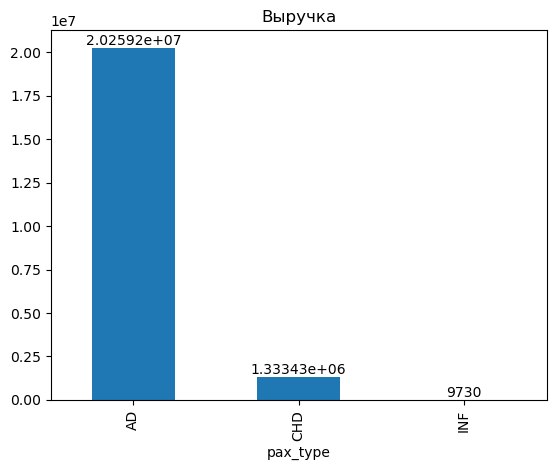

route_flight_type  revenue_amount
0               ВВЛ        19610480
1               МВЛ         1991890

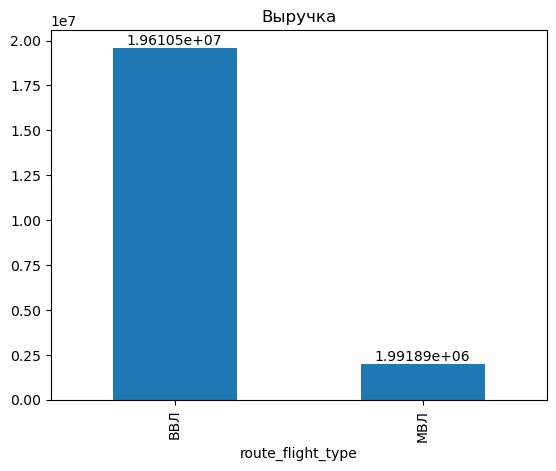

sale_type  revenue_amount
0   OFFLINE        10316900
1    ONLINE        11285470

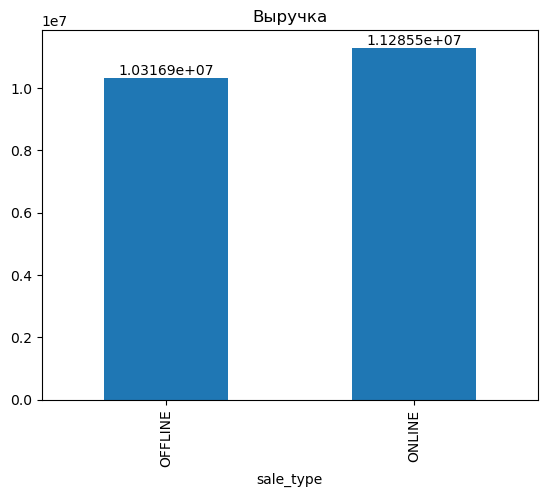

ffp_flag  revenue_amount
0         0        13379980
1         1         8222390

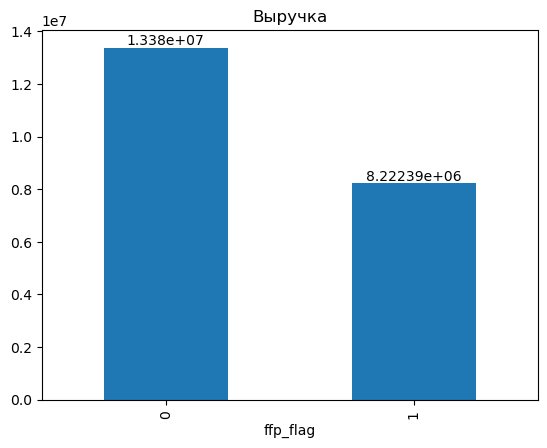

In [46]:
for element in help_list:
    report_revenue = df.groupby(element)['revenue_amount'].sum()
    display(report_revenue.reset_index())
    ax = report_revenue.plot(kind='bar',
                       title='Выручка',
                       legend=False
                       )
    ax.bar_label(ax.containers[0])
    plt.show()

Вывод:
   1. бОльшая часть выручки получена благодаря перелётам взрослых
   2. бОльшая часть выручки получена от продажи билетов с типом перелёта ВВЛ
   3. разница между выручкой от онлайн продажи и от оффлайн продажи несильно различается, но от онлайн продажи всё-таки выручка побольше
   4. бОльшая часть выручки получена от продажи билетов без программы лояльности

- 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.

<AxesSubplot:>

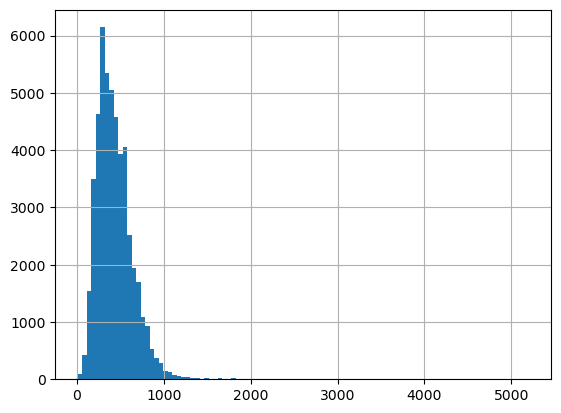

In [47]:
df['revenue_amount'].hist(bins=100)

Видно, что у гистограммы справа есть длинный "хвост", то есть иногда (редко) цены билета были необычно высокими.

<AxesSubplot:>

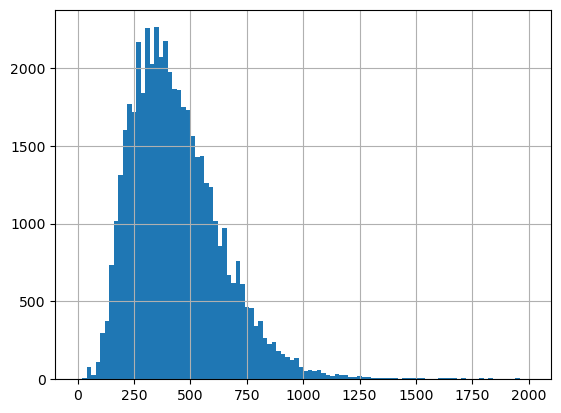

In [48]:
df['revenue_amount'].hist(bins=100, range=(0, 2000))

Приблизим

<AxesSubplot:>

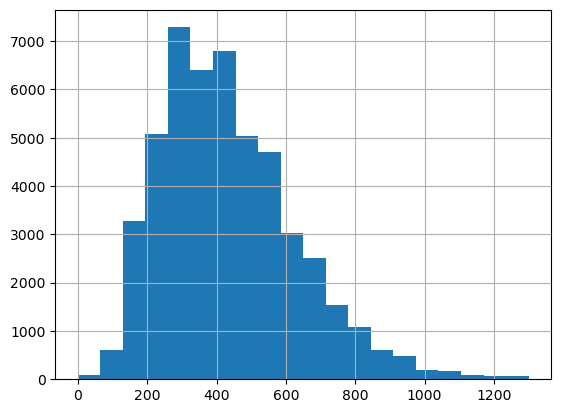

In [49]:
df['revenue_amount'].hist(bins=20, range=(0, 1300))

Построим точечную диаграмму

<AxesSubplot:xlabel='issue_date', ylabel='revenue_amount'>

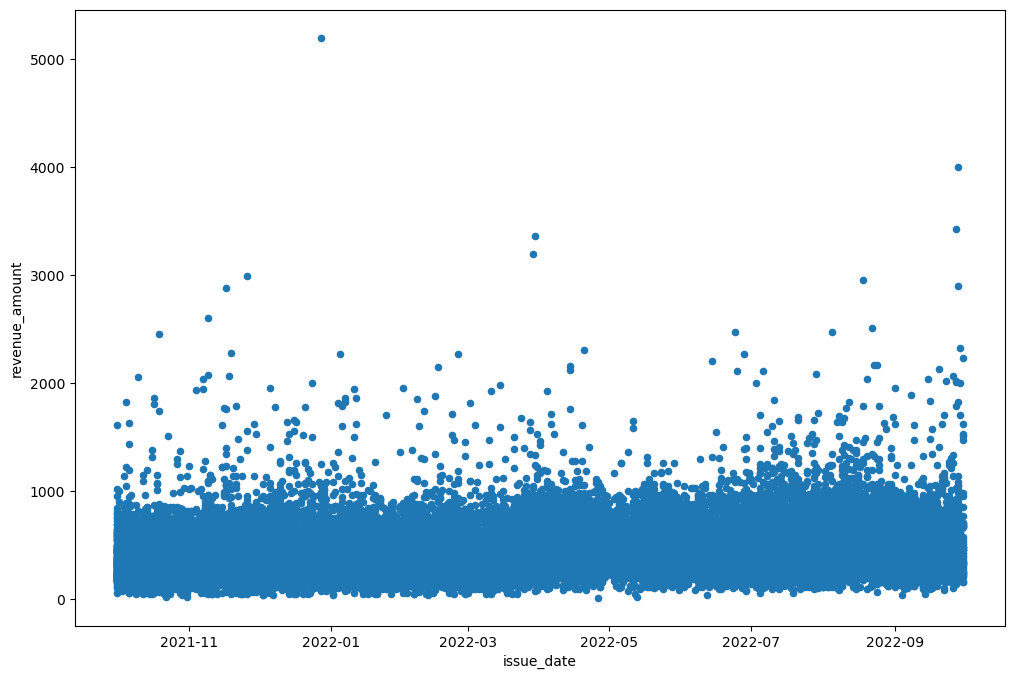

In [50]:
df.plot(kind='scatter',
       x='issue_date',
       y='revenue_amount',
       figsize=(12,8))

Видно, что есть выбросы

Построим ящик с усами (диаграмму размаха)

<AxesSubplot:>

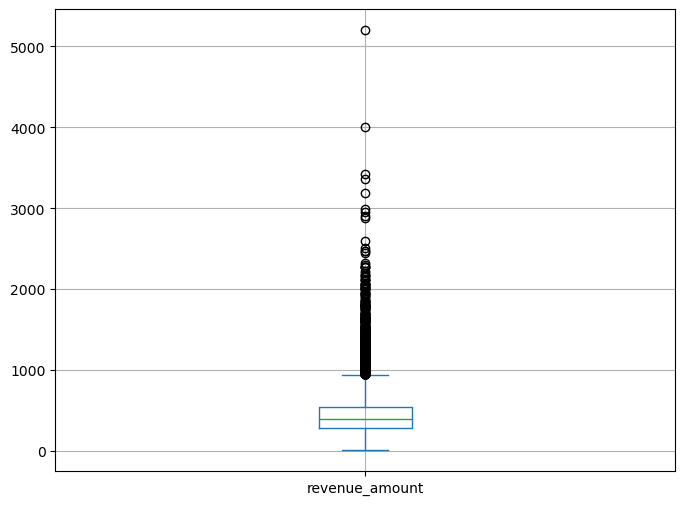

In [51]:
df['revenue_amount'].plot(kind='box', figsize=(8,6), grid=True)

<AxesSubplot:>

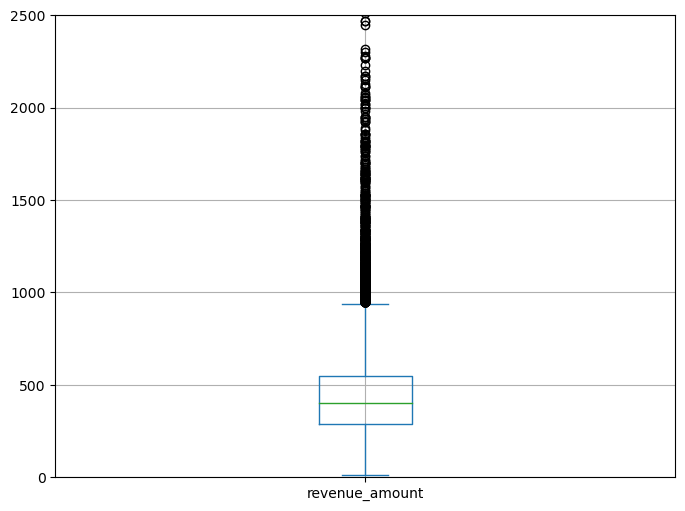

In [52]:
df['revenue_amount'].plot(kind='box', figsize=(8,6), grid=True, ylim=(0,2500))

In [53]:
df['revenue_amount'].describe()

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

In [54]:
# создаём функцию, которая возращает: (значение на конце верхнего уса, значение на конце нижнего уса, кол-во выбросов, процент выбросов от всего датасета)
def ejection(col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    ejection_perc = (ejection_count / len(df)) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [55]:
ejection('revenue_amount')

(940.0, -100.0, 987, 1.9995137960374376)

Т.е.:
- значение на конце верхнего уса: 940
- значение на конце нижнего уса 0 (-100 не м.б., т.к. выручка не м.б. отрицательной)
- кол-во выбросов: 987
- процент выбросов от всего датасета: 2%

В целом, 2% - не очень много, поэтому можем удалить эти выбросы

In [56]:
# Перевернем условия, чтобы отфильтровать датасет без выбросов
new_df = df[(df['revenue_amount'] < ejection('revenue_amount')[0]) & (df['revenue_amount'] > ejection('revenue_amount')[1])]
new_df = new_df.reset_index(drop=True)
new_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
48315            OMS               ВВЛ         0    ONLINE  
48316            MOW               ВВЛ         0   OFFLINE  
48317            KZN               ВВЛ         1    ONLINE  
48318            MOW               ВВЛ         0   OFFLINE  
48319            MOW               ВВЛ         1    ONLINE  

[48320 rows x 9 columns]

Проверим:

<AxesSubplot:>

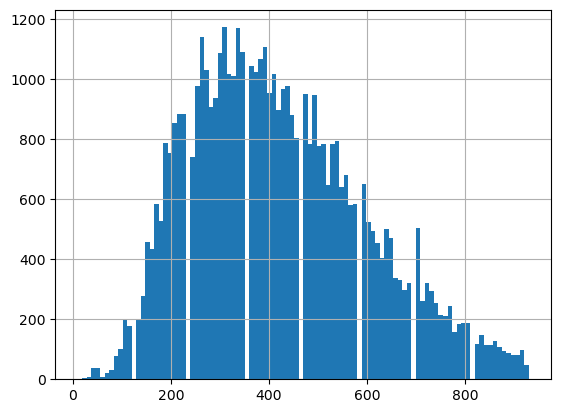

In [57]:
new_df['revenue_amount'].hist(bins=100)

<AxesSubplot:xlabel='issue_date', ylabel='revenue_amount'>

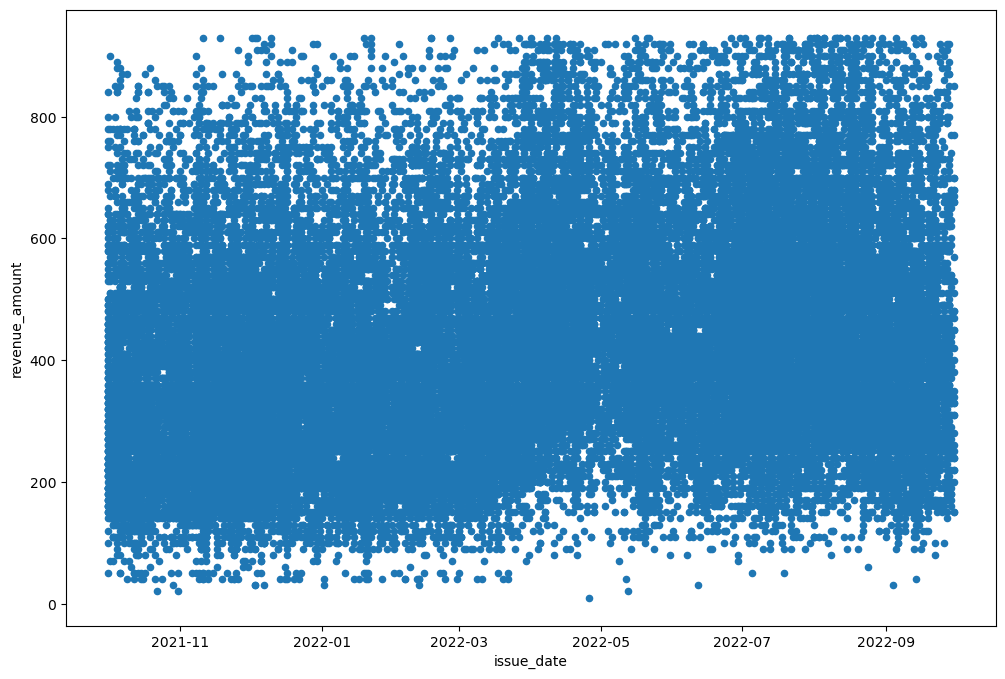

In [58]:
new_df.plot(kind='scatter',
       x='issue_date',
       y='revenue_amount',
       figsize=(12,8))

<AxesSubplot:>

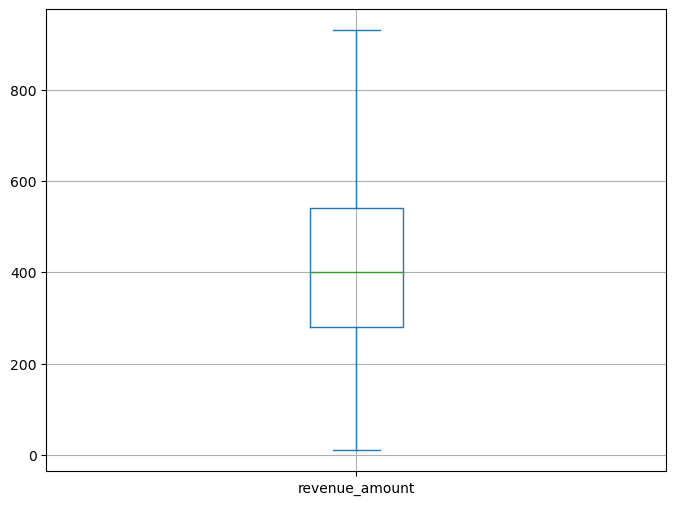

In [59]:
new_df['revenue_amount'].plot(kind='box', figsize=(8,6), grid=True)

In [60]:
new_df['revenue_amount'].describe()

count    48320.000000
mean       421.351407
std        177.791418
min         10.000000
25%        280.000000
50%        400.000000
75%        540.000000
max        930.000000
Name: revenue_amount, dtype: float64

Выбросов больше нет.

- 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

In [61]:
new_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  
0                KGD               ВВЛ         0    ONLINE  
1                OVB               ВВЛ         0   OFFLINE  
2                MOW               ВВЛ         1    ONLINE  
3                MOW               ВВЛ         0    ONLINE  
4                KRR               ВВЛ         1   OFFLINE  
...              ...               ...       ...       ...  
48315            OMS               ВВЛ         0    ONLINE  
48316            MOW               ВВЛ         0   OFFLINE  
48317            KZN               ВВЛ         1    ONLINE  
48318            MOW               ВВЛ         0   OFFLINE  
48319            MOW               ВВЛ         1    ONLINE  

[48320 rows x 9 columns]

In [62]:
new_df['month'] = new_df['issue_date'].dt.month

Кол-во продаж билетов по месяцам:

<AxesSubplot:>

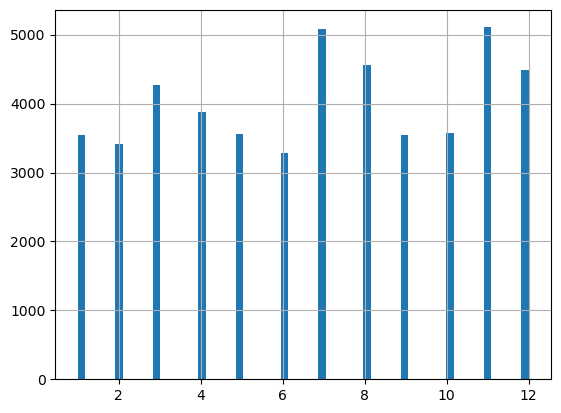

In [63]:
new_df['month'].hist(bins=60)

In [64]:
new_df['month'].value_counts()

11    5107
7     5079
8     4561
12    4490
3     4273
4     3883
10    3578
5     3559
1     3551
9     3550
2     3411
6     3278
Name: month, dtype: int64

Больше всего продаж было июле и ноябре, меньше всего - в июне

Гистограмма кол-ва проданных билетов за исследуемый период

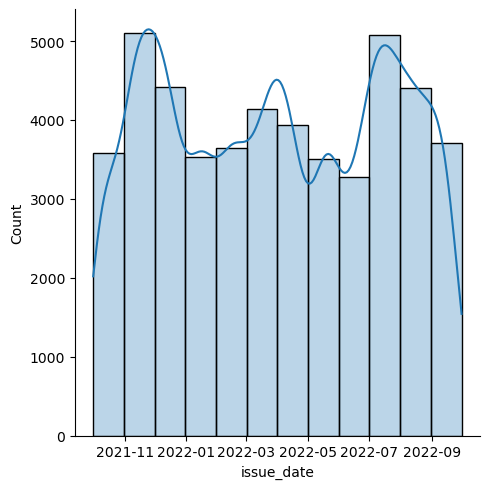

In [65]:
sns.displot(new_df['issue_date'], bins=12, kde=True, alpha=0.3)

In [66]:
new_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  
0                KGD               ВВЛ         0    ONLINE     12  
1                OVB               ВВЛ         0   OFFLINE     12  
2                MOW               ВВЛ         1    ONLINE     11  
3                MOW               ВВЛ         0    ONLINE     12  
4                KRR               ВВЛ         1   OFFLINE     12  
...              ...               ...       ...       ...    ...  
48315            OMS               ВВЛ         0    ONLINE      6  
48316            MOW               ВВЛ         0   OFFLINE      6  
48317            KZN               ВВЛ         1    ONLINE      6  
48318            MOW               ВВЛ         0   OFFLINE      6  
48319            MOW               ВВЛ         1    ONLINE      6  

[48320 rows x 10 columns]

Создадим новый столбец с временем года:

In [67]:
def season(month):
    if month in [12,1,2]:
        return 'winter'
    if month in [3,4,5]:
        return 'spring'
    if month in [6,7,8]:
        return 'summer'
    if month in [9,10,11]:
        return 'autumn'

In [68]:
new_df['season'] = new_df['month'].apply(season)

Кол-во продаж по времени года:

<AxesSubplot:>

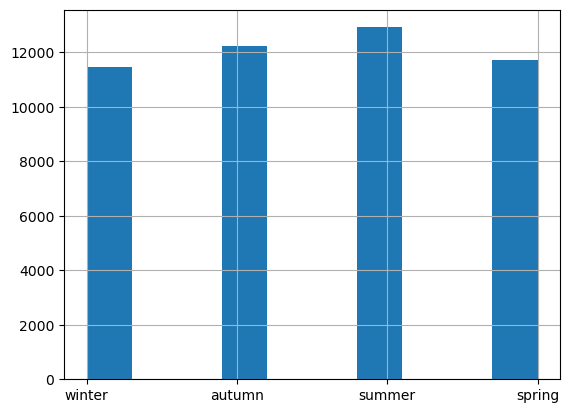

In [69]:
new_df['season'].hist()

In [70]:
new_df['season'].value_counts()

summer    12918
autumn    12235
spring    11715
winter    11452
Name: season, dtype: int64

Больше всего продаж было осенью, меньше всего - зимой

Создадим сводную таблицу выручки по дням с детализацией по времени года:

In [71]:
# сводная таблица выручки по времени года
pivot = new_df.pivot_table(index='issue_date',
                  columns='season',
                  aggfunc='sum',
                  values='revenue_amount')
pivot

season       autumn  spring  summer  winter
issue_date                                 
2021-10-01  56730.0     NaN     NaN     NaN
2021-10-02  32100.0     NaN     NaN     NaN
2021-10-03  34320.0     NaN     NaN     NaN
2021-10-04  57050.0     NaN     NaN     NaN
2021-10-05  56720.0     NaN     NaN     NaN
...             ...     ...     ...     ...
2022-09-26  33730.0     NaN     NaN     NaN
2022-09-27  38070.0     NaN     NaN     NaN
2022-09-28  29830.0     NaN     NaN     NaN
2022-09-29  21440.0     NaN     NaN     NaN
2022-09-30  15690.0     NaN     NaN     NaN

[365 rows x 4 columns]

Получим выручку по дням только за период осени (это нам потребуется для проверки гипотезы (ниже)):

In [72]:
# Оставляет датасет без строк, в которых есть пропуски по по столбцу 'summer'
df_autumn = pivot.dropna(subset=['autumn'])
df_autumn = df_autumn['autumn']
df_autumn

issue_date
2021-10-01    56730.0
2021-10-02    32100.0
2021-10-03    34320.0
2021-10-04    57050.0
2021-10-05    56720.0
               ...   
2022-09-26    33730.0
2022-09-27    38070.0
2022-09-28    29830.0
2022-09-29    21440.0
2022-09-30    15690.0
Name: autumn, Length: 91, dtype: float64

In [73]:
np.mean(df_autumn)

50365.604395604394

Построим диаграмму размаха:

<AxesSubplot:>

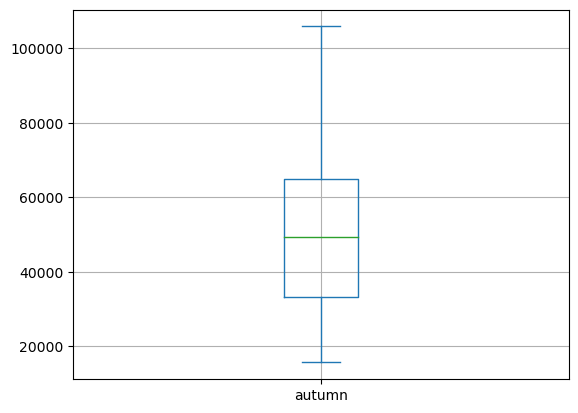

In [74]:
df_autumn.plot(kind='box', grid=True)

Выбросов нет.

Получим выручку по дням только за период зимы (это нам потребуется для проверки гипотезы (ниже)):

In [75]:
df_winter = pivot.dropna(subset =['winter'])
df_winter = df_winter['winter']
df_winter

issue_date
2021-12-01    71800.0
2021-12-02    70770.0
2021-12-03    69540.0
2021-12-04    43970.0
2021-12-05    40380.0
               ...   
2022-02-24    57990.0
2022-02-25    53590.0
2022-02-26    29430.0
2022-02-27    18250.0
2022-02-28    55490.0
Name: winter, Length: 90, dtype: float64

In [76]:
np.mean(df_winter)

47372.555555555555

Построим диаграмму размаха:

<AxesSubplot:>

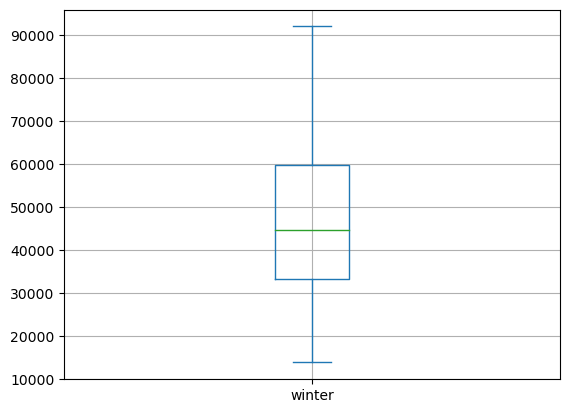

In [77]:
df_winter.plot(kind='box', grid=True)

Выбросов нет.

Проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается.

1. Сформулирем нулевую (H0) и альтернативную (H1) гипотезы:<br>
    <b>H0</b>: средняя выручка в день осенью равна средней выручке в день зимой (т.е. выручка от продаж осенью и зимой не отличается)<br>
    <b>H1</b>: средняя выручка в день осенью не равна средней выручке в день зимой (т.е. выручка от продаж осенью и зимой отличается)
    
    
Гипотеза *двусторонняя* (есть возможное отклонение и в большую, и в меньшую стороны)

2. Выберем уровень статистической значимости α = 5% = 0.05

3. Выбор статистического критерия<br>
Итак, нам нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.<br>
Чтобы понять, можем ли мы использовать для проверки гипотезы t-test (Стьюдента), надо проверить, выполняются ли следующие условия проведения t-теста:
 * Незавимость генеральных совокупностей друг от друга.
 * Нормальность распределения (если меньше 30 наблюдений)
 * Гомогенность дисперсий т.е дисперсии должны быть приблизительно равны. 


✓ Наши генеральные совокупности независимы (выручка осенью не зависит от выручки зимой, и наоборот)

В обеих выборках (выручка от продаж осенью и выручка от продаж зимой) нет выбросов (см. выше)

In [78]:
# дисперсия выручки осенью
np.var(df_autumn)

434257448.81053025

In [79]:
# дисперсия выручки зимой
np.var(df_winter)

302616016.8024692

In [80]:
np.var(df_autumn)-np.var(df_winter)

131641432.00806105

✕ Дисперсии не гомогенны, они значительно отличаются друг от друга

 Несмотря на то что в обеих выборках наблюдений больше 30 (осенью 91 наблюдение, зимой 90 наблюдений), стоит всё равно проверить их на нормальность распределения.<br>
 Способы проверки распределения на нормальность:
* Визуальный с помощью QQ-plot
*  С помощью статистического теста (тест Шапиро-Уилка)

Для начала построим график функция плотности вероятности (распределения) выручки осенью:

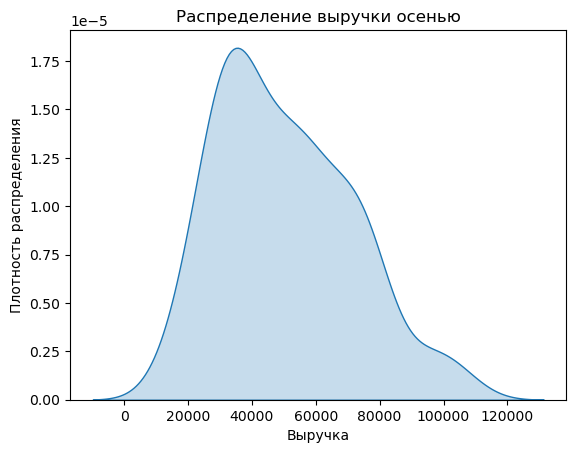

In [81]:
sns.kdeplot(df_autumn, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки осенью')
 
plt.show()

Визуально, график функция плотности вероятности (распределения) выручки осенью не похож на график нормального распределения.

Построим Q-Q plot:

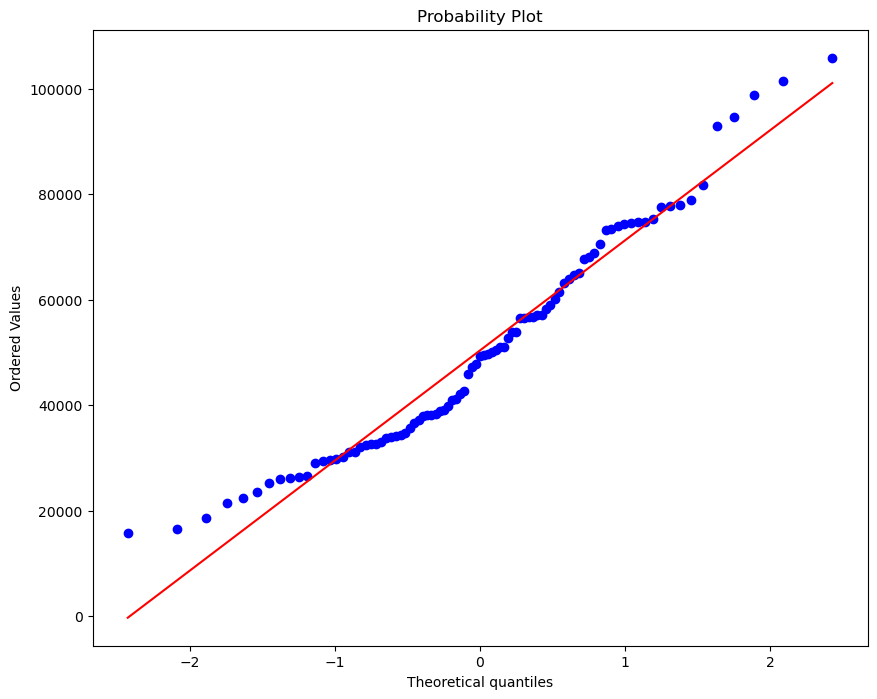

In [82]:
plt.figure(figsize = (10,8))
st.probplot(df_autumn, dist='norm', plot = plt)
plt.show()

Большинство точек не лежит на прямой. Это значит, что распределение выручки осенью не соответствует нормальному распределению.

Проведём статистический тест Шапиро-Уилка (ограничение использования данного теста: наблюдений должно быть не более 5000. Количество наблюдений в наших выборках удовлетворяют этому ограничению).<br>
(Также выше было выяснено, что выбросов в данных по выручке осенью нет. Это значит, что результаты теста Шапиро-Уилка не будут искажены из-за выбросов)

Нулевая гипотеза H0 предполагает, что распределение нормально. <br>
Альтернативная гипотеза H1 утверждает обратное.

In [83]:
# тест Шапиро-Уилка
stat, p = st.shapiro(df_autumn)

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.003951451741158962 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


✕ По всем способам проверки распределения на нормальность мы пришли к выводу, что распределение выручки осенью не соответствует нормальному распределению.

Теперь построим график функция плотности вероятности (распределения) выручки зимой:

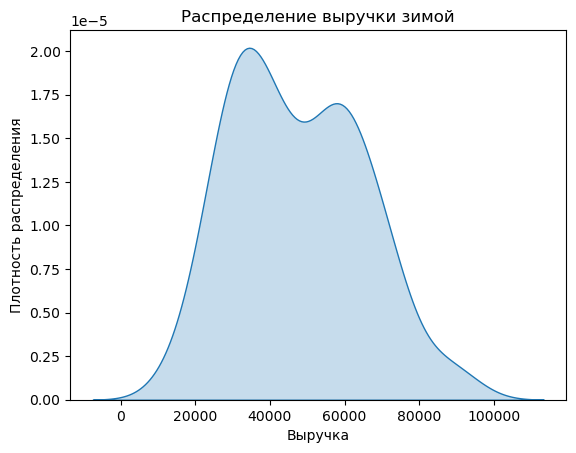

In [84]:
sns.kdeplot(df_winter, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки зимой')
 
plt.show()

Визуально, график функция плотности вероятности (распределения) выручки зимой не похож на график нормального распределения.

Построим Q-Q plot:

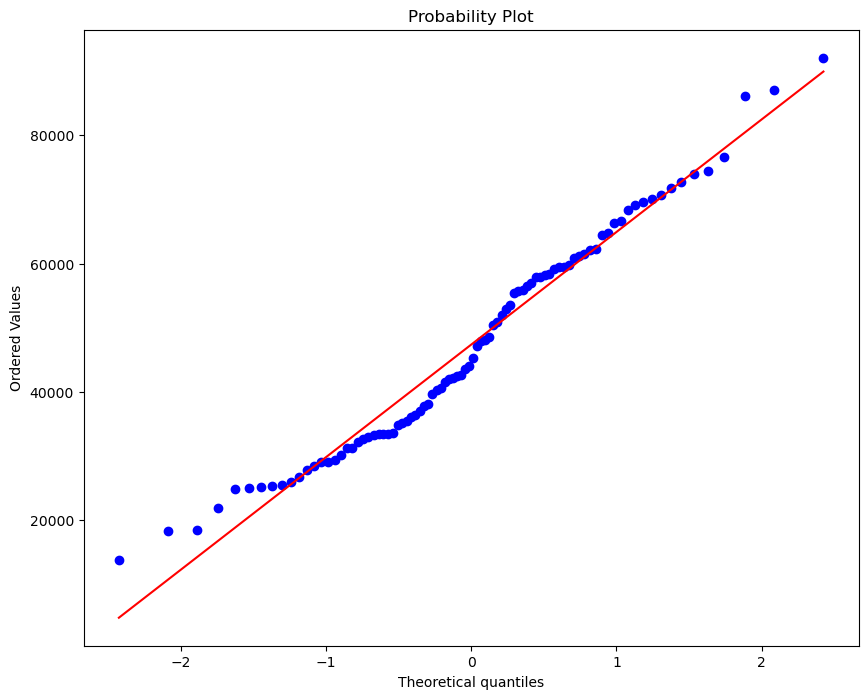

In [85]:
plt.figure(figsize = (10,8))
st.probplot(df_winter, dist='norm', plot = plt)
plt.show()

Большинство точек не лежит на прямой. Это значит, что распределение выручки зимой не соответствует нормальному распределению.

Проведём статистический тест Шапиро-Уилка (ограничение использования данного теста: наблюдений должно быть не более 5000. Количество наблюдений в наших выборках удовлетворяют этому ограничению).<br>
(Также выше было выяснено, что выбросов в данных по выручке зимой нет. Это значит, что результаты теста Шапиро-Уилка не будут искажены из-за выбросов)

Нулевая гипотеза H0 предполагает, что распределение нормально. <br>
Альтернативная гипотеза H1 утверждает обратное.

In [86]:
# тест Шапиро-Уилка
stat, p = st.shapiro(df_winter)

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.04078749567270279 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


✕ По всем способам проверки распределения на нормальность мы пришли к выводу, что распределение выручки зимой не соответствует нормальному распределению.

В итоге, можно сделать вывод, что нельзя использовать t-test для проверки гипотезы о том, что выручка от продаж осенью и зимой не отличается.

Поэтому для проверки нашей гипотезы следует использовать <b>непараметрический тест Уилкоксона-Манна-Уитни</b>, т.к. он не требует предположений о нормальности распределения данных:

In [87]:
alpha = 0.05 # уровень статистической значимости

# если p-value окажется меньше него, отвергнем гипотезу

results = st.mannwhitneyu(df_autumn, df_winter)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.45638923686621347
Не удалось отвергнуть нулевую гипотезу


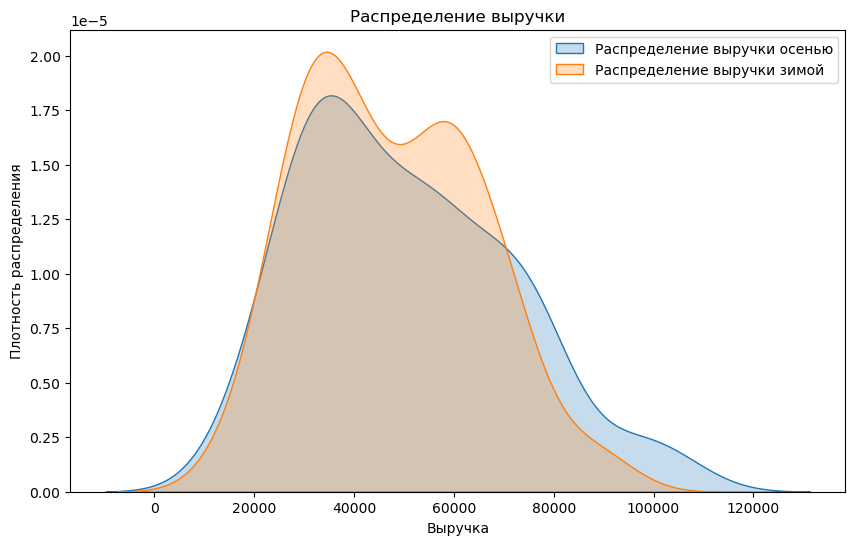

In [88]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_autumn, fill=True)
sns.kdeplot(df_winter, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки')
plt.legend(('Распределение выручки осенью', 'Распределение выручки зимой')) 
plt.show()

<div class="alert alert-block alert-info">
    <b>Вывод:</b> таким образом, нам <b>не удалось отвергнуть нулевую гипотезу H0</b> о том, что отсутствуют статистически значимые различия между выборками (выручкой осенью и выручкой зимой). Следовательно, <b>с доверительной вероятностью 95% мы можем сделать вывод о том, что выручка от продаж осенью и зимой не отличается</b>.

Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

Создадим таблицу числа продаж и суммы выручки по месяцам:

In [89]:
count_sum_revenue_month = new_df.groupby('month').agg({'revenue_amount': ['count', 'sum']})
count_sum_revenue_month

revenue_amount         
               count      sum
month                        
1               3551  1303150
2               3411  1294370
3               4273  1758080
4               3883  1930440
5               3559  1647920
6               3278  1530140
7               5079  2434800
8               4561  2211520
9               3550  1538280
10              3578  1279930
11              5107  1765060
12              4490  1666010

In [90]:
count_sum_revenue_month.columns

MultiIndex([('revenue_amount', 'count'),
            ('revenue_amount',   'sum')],
           )

Рассчитываем коэффициент корреляции Пирсона

In [91]:
count_sum_revenue_month[('revenue_amount', 'count')].corr(count_sum_revenue_month[('revenue_amount', 'sum')])

0.7527418389724393

<div class="alert alert-block alert-info">
Высокая линейная корреляция, то есть <b>связь тесная</b> между кол-вом купленных билетов и выручкой. Направление <b>связи прямое</b>, то есть чем больше было куплено билетов, тем больше выручка

- 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.

Создадим новый столбец с количеством дней между покупкой билета и рейсом:

In [92]:
new_df['urgency'] = (new_df['flight_date_loc'] - new_df['issue_date']).dt.days
# dt.days нужно, чтобы не выводилось слово days после каждого числа в нашем новом столбце

In [93]:
new_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency  
0           35  
1            3  
2           37  
3           28  
4           35  
...        ...  
48315       11  
48316       14  
48317        3  
48318        2  
48319       16  

[48320 rows x 12 columns]

Посмотрим заодно коэффициент корреляции Пирсона между количеством дней с момента покупки билета до рейса и стоимостью билета (выручкой)

In [94]:
new_df['urgency'].corr(new_df['revenue_amount'])

0.05896809872574174

Связь (линейная корреляция) очень слабая (чем больше дней до рейса с момента покупки билета, тем выше стоимость билета (выше выручка)), практически отсутствует. (Важно, что это парный коэффициент корреляции, поэтому остальные факторы (помимо количества дней) не учитываются)

Построим гистограмму частот по столбцу разницы в днях между покупкой билета и рейсом (столбец <code>'urgency'</code>):

<AxesSubplot:>

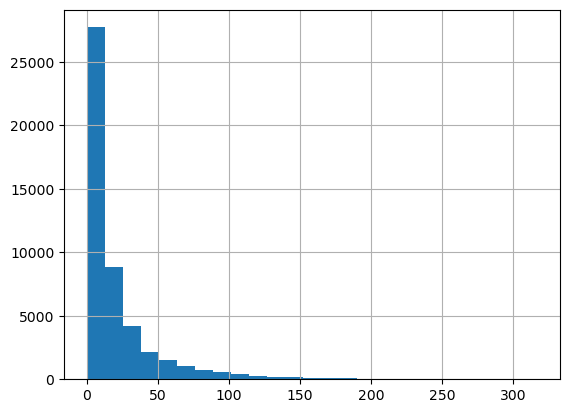

In [95]:
new_df['urgency'].hist(bins=25)

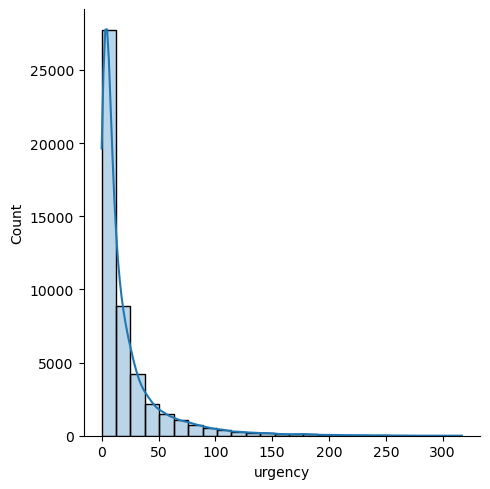

In [96]:
sns.displot(new_df['urgency'], bins=25, kde=True, alpha=0.3)

In [97]:
new_df['urgency'].describe()

count    48320.000000
mean        21.054408
std         30.942410
min          0.000000
25%          3.000000
50%          9.000000
75%         25.000000
max        317.000000
Name: urgency, dtype: float64

Разобьём клиентов на 4 группы по квартилям по столбцу <code>'urgency'</code> (которые получили только что выше в <code>.describe()</code>)

Для проверки гипотезы (о которой сейчас пойдёт речь) нас будут интересовать только две *крайние* группы, то есть первая группа и четвёртая группа.

Первая группа (first_group) - 25% самых поздно покупающих билет клиентов (максимум за 3 дня до рейса покупают билет)

In [98]:
# выручка от продажи билетов для первой группы
first_group = new_df[new_df['urgency']<=3]['revenue_amount']
first_group

1        610
122      310
217      810
226      550
289      670
        ... 
48311    260
48313    520
48314    450
48317    230
48318    270
Name: revenue_amount, Length: 12103, dtype: int64

In [99]:
np.mean(first_group)

406.13071139386926

Четвёртая группа (fourth_group) - 25% самых заранее покупающих билет клиентов (минимум за 26 дней до рейса покупают билет)

In [100]:
# выручка от продажи билетов для четвёртой группы
fourth_group = new_df[new_df['urgency']>=26]['revenue_amount']
fourth_group

0        200
2        390
3        190
4        190
5        250
        ... 
48215    530
48216    320
48217    590
48221    320
48223    640
Name: revenue_amount, Length: 11744, dtype: int64

In [101]:
np.mean(fourth_group)

435.51430517711174

Построим диаграмму размаха для выручки от продажи билетов для первой группы:

<AxesSubplot:>

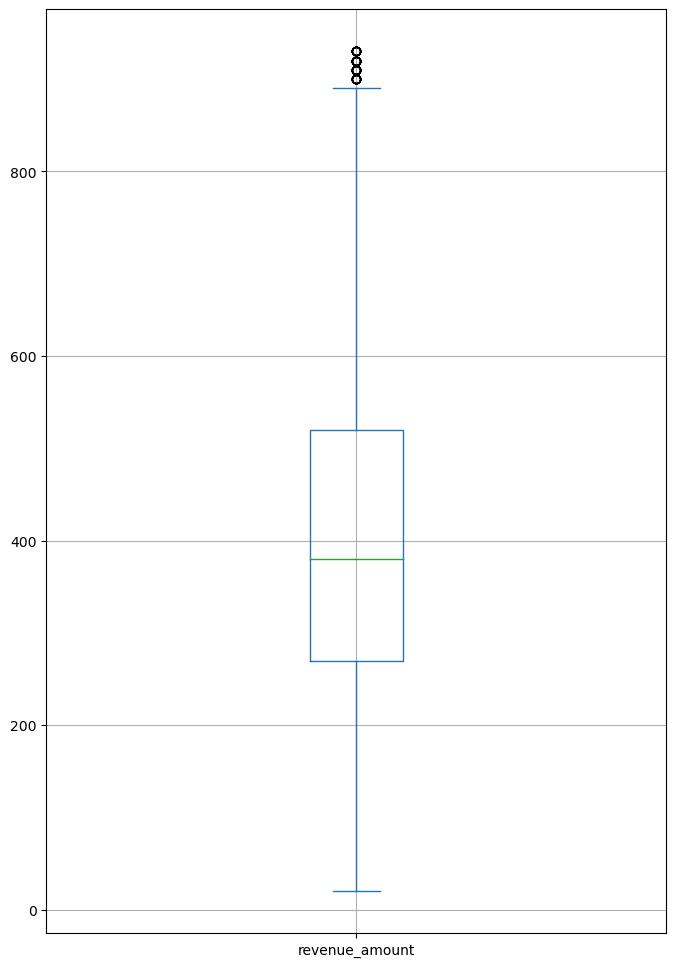

In [102]:
plt.figure(figsize=(8,12))
first_group.plot(kind='box', grid=True)

In [103]:
def ejection(series):
    q75 = np.percentile(series, 75)
    q25 = np.percentile(series, 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = series[(series > ejection_h) | (series < ejection_l)].count()
    ejection_perc = (ejection_count / len(fourth_group)) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [104]:
ejection(first_group)

(895.0, -105.0, 66, 0.5619891008174387)

Есть 66 выбросов (это 0.56% от всего объёма первой группы).

In [105]:
# Создадим новый объект Series без выбросов first_group_clean
first_group_clean = first_group[(first_group < ejection(first_group)[0]) & (first_group > ejection(first_group)[1])]
first_group_clean

1        610
122      310
217      810
226      550
289      670
        ... 
48311    260
48313    520
48314    450
48317    230
48318    270
Name: revenue_amount, Length: 12037, dtype: int64

Построим диаграмму размаха для выручки от продажи билетов для четвёртой группы:

<AxesSubplot:>

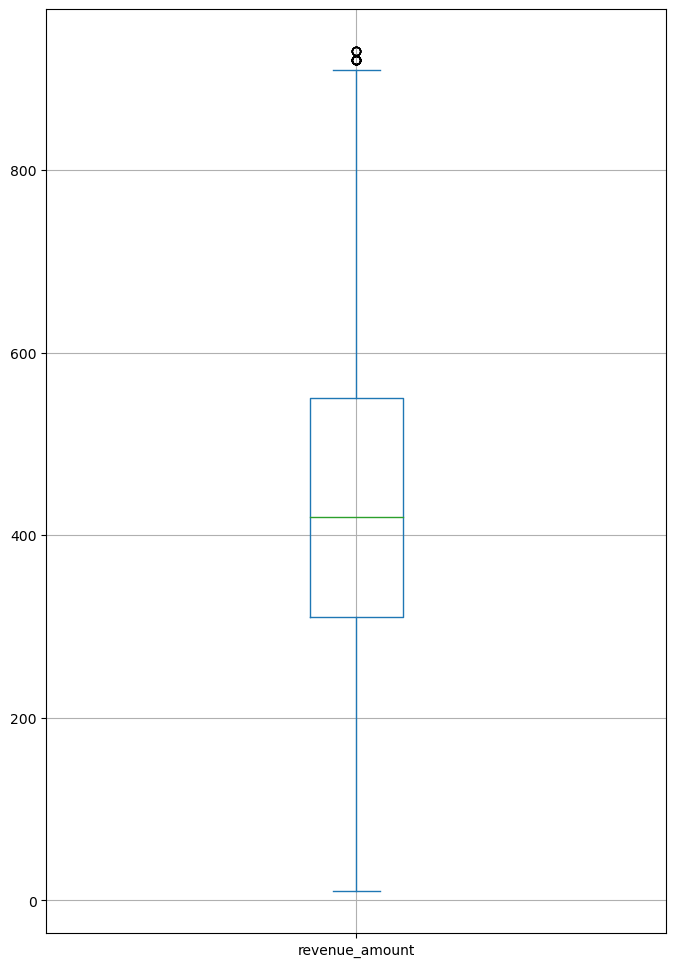

In [106]:
plt.figure(figsize=(8,12))
fourth_group.plot(kind='box', grid=True)

In [107]:
ejection(fourth_group)

(910.0, -50.0, 23, 0.19584468664850135)

Есть 23 выброса (это 0.20% от всего объёма первой группы).

In [108]:
# Создадим новый объект Series без выбросов fourth_group_clean
fourth_group_clean = fourth_group[(fourth_group < ejection(fourth_group)[0]) & (fourth_group > ejection(fourth_group)[1])]
fourth_group_clean

0        200
2        390
3        190
4        190
5        250
        ... 
48215    530
48216    320
48217    590
48221    320
48223    640
Name: revenue_amount, Length: 11699, dtype: int64

In [109]:
np.mean(first_group_clean)

403.3397025837003

Мы видим, что и в первой, и в четвёртой группах есть выбросы. Однако относительно общего объёма каждой выборки (около 12000 наблюдений каждая) количество выбросов мало. Учитывая это, а также то, что эти выбросы расположены недалеко от границ усов диаграммы размаха (иначе, если они бы были прямо очень экстремальными, то они могли бы исказить дальнейшее исследование), мы можем оставить их и продолжить работать дальше.<br>
Однако на всякий случай после проверим результаты и без выбросов.

1. Сформулирем нулевую (H0) и альтернативную (H1) гипотезы:<br>
    <b>H0</b>: средняя выручка от продажи билетов (средняя цена билета) для первой группы клиентов (first_group, покупающие билет максимум за 3 дня до рейса) равна средней выручке от продажи билетов для четвёртой группы клиентов (fourth_group, покупающие билет минимум за 26 дней до рейса)<br>
    Другими словами, выручка от продажи билетов для первой группы клиентов и выручка от продажи билетов для четвёртой группы клиентов не отличаются.<br>
    <b>H1</b>: средняя выручка от продажи билетов (средняя цена билета) для первой группы клиентов (first_group, покупающие билет максимум за 3 дня до рейса) не равна средней выручке от продажи билетов для четвёртой группы клиентов (fourth_group, покупающие билет минимум за 26 дней до рейса)<br>
    Другими словами, выручка от продажи билетов для первой группы клиентов и выручка от продажи билетов для четвёртой группы клиентов отличаются.
    
    
Гипотеза *двусторонняя* (есть возможное отклонение и в большую, и в меньшую стороны)

2. Выберем уровень статистической значимости α = 5% = 0.05

3. Выбор статистического критерия<br>
Итак, нам нужно проверить гипотезу о равенстве средних двух генеральных совокупностей.<br>
Чтобы понять, можем ли мы использовать для проверки гипотезы t-test (Стьюдента), надо проверить, выполняются ли следующие условия проведения t-теста:
 * Незавимость генеральных совокупностей друг от друга.
 * Нормальность распределения (если меньше 30 наблюдений)
 * Гомогенность дисперсий т.е дисперсии должны быть приблизительно равны. 

✓ Наши генеральные совокупности независимы (выручка первой группы клиентов не зависит от выручки четвёртой группы клиентов, и наоборот)

In [110]:
np.var(first_group)

30991.167579490815

In [111]:
np.var(fourth_group)

29871.329495634513

In [112]:
np.var(fourth_group) - np.var(first_group)

-1119.8380838563025

✓ Дисперсии, в целом, могут считаться приблизительно равными

 Несмотря на то что в обеих выборках наблюдений больше 30 (первая группа 12103 наблюдений, четвёртая группа 11744 наблюдений), стоит всё равно проверить их на нормальность распределения.<br>
 Способы проверки распределения на нормальность:
* Визуальный с помощью QQ-plot
*  С помощью статистического теста (тест Шапиро-Уилка)

Для начала построим график функция плотности вероятности (распределения) выручки от продажи билетов для первой группы:

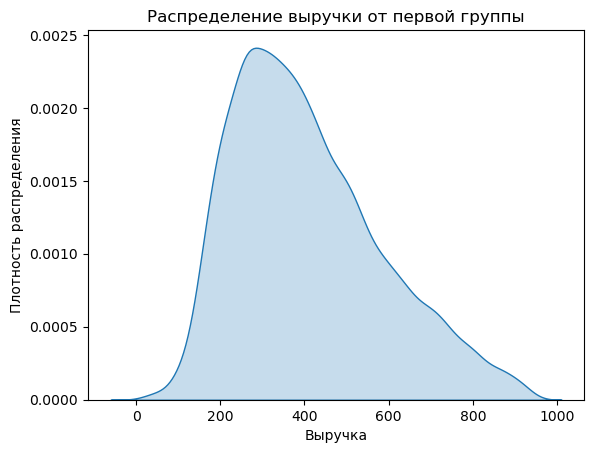

In [113]:
sns.kdeplot(first_group, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки от первой группы')
 
plt.show()

Визуально, видна правосторонняя асимметрия.

Построим Q-Q plot:

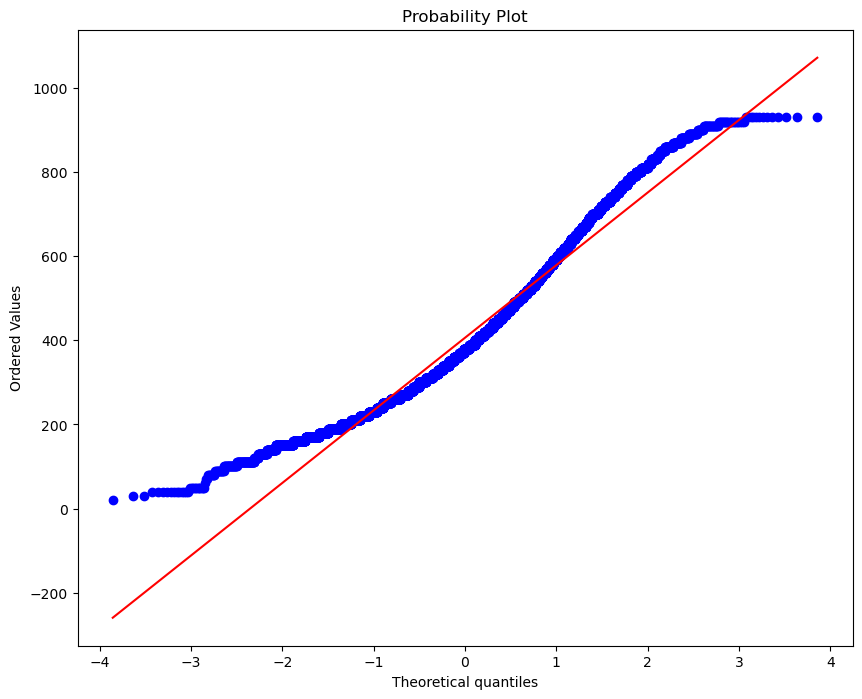

In [114]:
plt.figure(figsize = (10,8))
st.probplot(first_group, dist='norm', plot = plt)
plt.show()

✕ Большинство точек не лежит на прямой. Это значит, что распределение выручки от продажи билетов для первой группы не соответствует нормальному распределению.

Статистический тест Шапиро-Уилка мы провести не можем, так как количество наблюдений в нашей выборке (выручка от продаж для первой группы) превышает ограничение в 5000 наблюдений.

Теперь построим график функция плотности вероятности (распределения) выручки от продажи билетов для четвёртой группы:

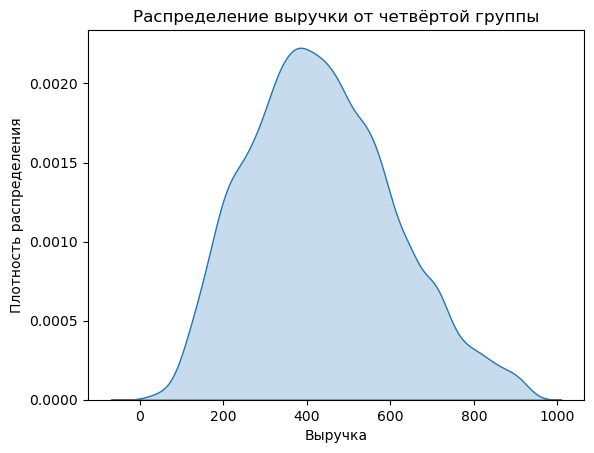

In [115]:
sns.kdeplot(fourth_group, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки от четвёртой группы')
 
plt.show()

Визуально, не совсем похоже на график нормального распределения.

Построим Q-Q plot:

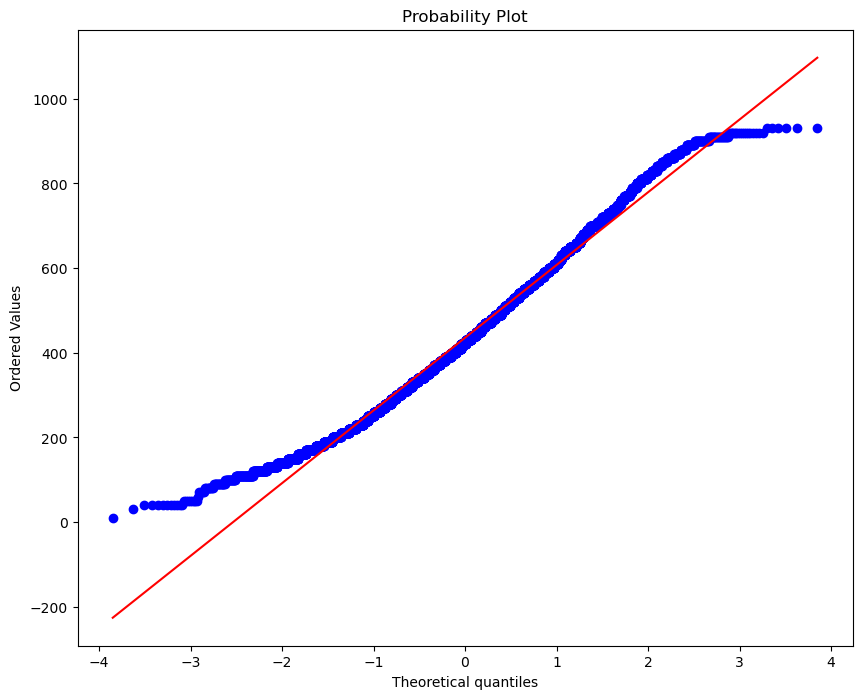

In [116]:
plt.figure(figsize = (10,8))
st.probplot(fourth_group, dist='norm', plot = plt)
plt.show()

В данном случае на прямой ещё больше точек лежит, но всё равно часть точек (особенно при приблежении к минимальной и максимальной цене билета для данной (четвёртой группы)) на прямой не лежат. Распределение выручки от продажи билетов для четвёртой группы, скорее всего, не совсем соответствует нормальному распределению.

Статистический тест Шапиро-Уилка мы провести не можем, так как количество наблюдений в нашей выборке (выручка от продаж для четвёртой группы) превышает ограничение в 5000 наблюдений.

В итоге, можно сделать вывод, что нельзя использовать t-test для проверки гипотезы о том, что выручка от продажи билетов для первой группы не отличается от выручки от продажи билетов для четвёртой группы.

Поэтому для проверки нашей гипотезы следует использовать <b>непараметрический тест Уилкоксона-Манна-Уитни</b>, т.к. он не требует предположений о нормальности распределения данных:

In [117]:
alpha = 0.05 # уровень статистической значимости

# если p-value окажется меньше него, отвергнем гипотезу

results = st.mannwhitneyu(first_group, fourth_group)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 3.8464968593674463e-53
Следует отвергнуть нулевую гипотезу


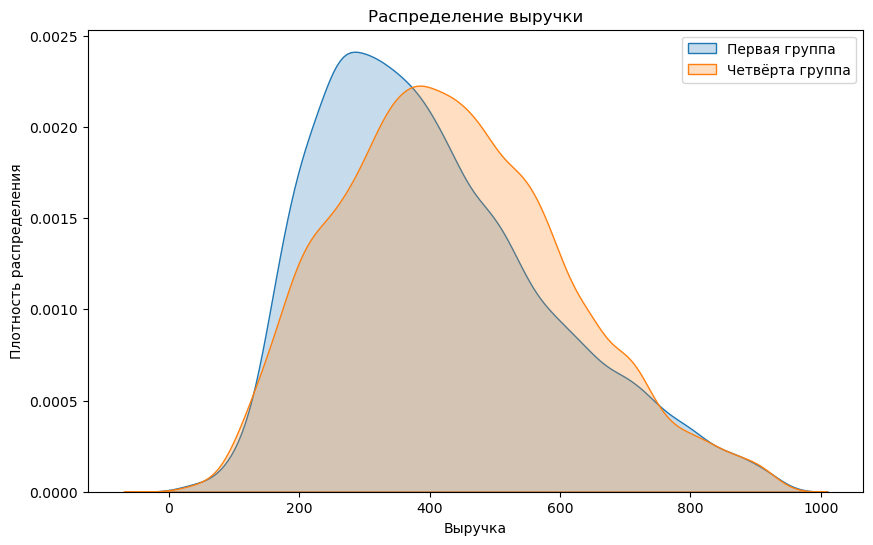

In [118]:
plt.figure(figsize=(10,6))
sns.kdeplot(first_group, fill=True)
sns.kdeplot(fourth_group, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки')
plt.legend(('Первая группа', 'Четвёрта группа')) 
plt.show()

<div class="alert alert-block alert-info">
    <b>Вывод:</b> таким образом, мы <b>отвергаем нулевую гипотезу H0</b> о том, что отсутствуют статистически значимые различия между выборками (выручкой от продажи билетов для первой группы и выручкой от продажи билетов для четвёртой группы). Следовательно, <b>с доверительной вероятностью 95% мы можем сделать вывод о том, что выручка от продажи билетов для первой группы (25% самых поздно покупающих билет клиентов) и выручка от продажи билетов для четвёртой группы (25% самых заранее покупающих билет клиентов) отличаются</b>.

Теперь убедимся, что если бы мы убрали выбросы, то всё равно пришли бы к тому же результату:

Для первой группы:

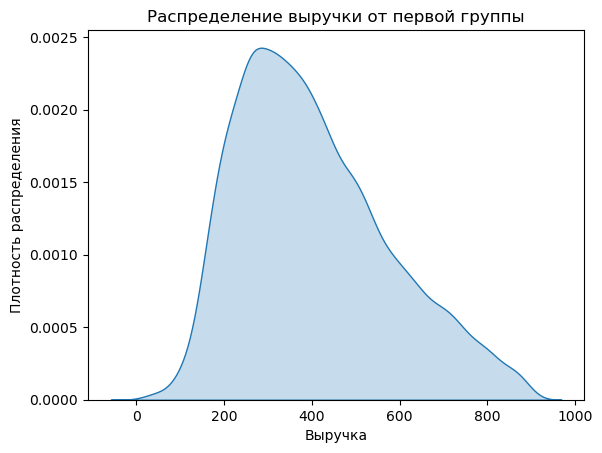

In [119]:
sns.kdeplot(first_group_clean, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки от первой группы')
 
plt.show()

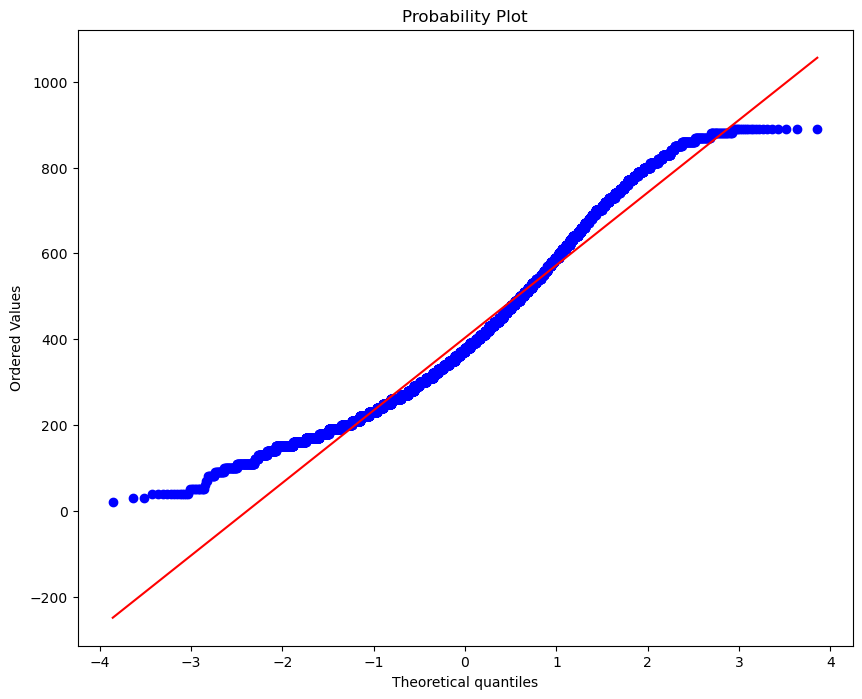

In [120]:
plt.figure(figsize = (10,8))
st.probplot(first_group_clean, dist='norm', plot = plt)
plt.show()

✕ Большинство точек не лежит на прямой. Это значит, что распределение выручки от продажи билетов для первой группы не соответствует нормальному распределению.

Для четвёртой группы:

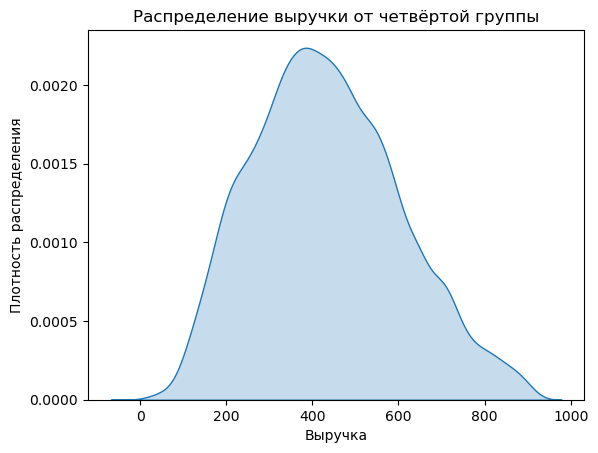

In [121]:
sns.kdeplot(fourth_group_clean, fill=True)

plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.title('Распределение выручки от четвёртой группы')
 
plt.show()

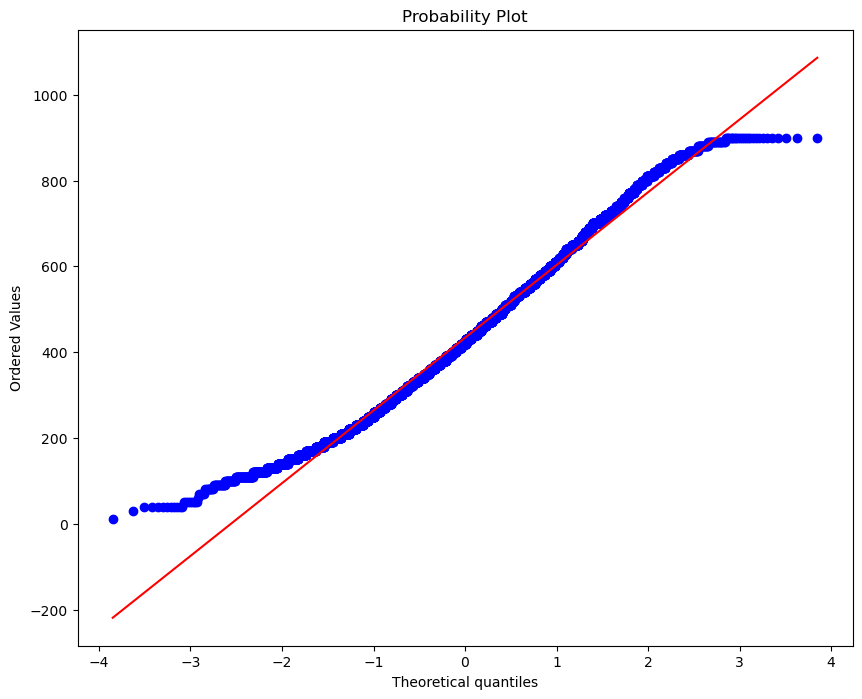

In [122]:
plt.figure(figsize = (10,8))
st.probplot(fourth_group_clean, dist='norm', plot = plt)
plt.show()

В данном случае на прямой ещё больше точек лежит, но всё равно часть точек (особенно при приблежении к минимальной и максимальной цене билета для данной (четвёртой группы)) на прямой не лежат. Распределение выручки от продажи билетов для четвёртой группы, скорее всего, не совсем соответствует нормальному распределению.

В итоге, можно сделать вывод, что нельзя использовать t-test для проверки гипотезы о том, что выручка от продажи билетов для первой группы не отличается от выручки от продажи билетов для четвёртой группы.

Поэтому для проверки нашей гипотезы следует использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к. он не требует предположений о нормальности распределения данных:

In [123]:
alpha = 0.05 # уровень статистической значимости

# если p-value окажется меньше него, отвергнем гипотезу

results = st.mannwhitneyu(first_group_clean, fourth_group_clean)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 2.4201741044489098e-55
Следует отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
В итоге мы так же, как и в случае данных с выбросами, отвергаем нулевую гипотезу H0.<br>
Вывод получается аналогичным.

- 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [124]:
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

In [125]:
data = pd.read_csv(url, header=None) # чтобы без заголовков столбцов было, так как  иначе строка датасета становится заголовком

In [126]:
data

0                                            1             2   \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

                    3    4     5          6           7     8   9   10  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998  5282  10   U   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001    20  10   U   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005  5388  10   U   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977   239  10   U   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001   146  10   U   
...                ...  ...   ...        ...         ...   ...  ..  ..   
7693            Russia   \N  ULDA  71.616699   52.478298   272  \N  \N   
7694            Russia   \N  XIUW  51.849998  107.737999  1670  \N  \N   
7695            Russia   \N  ULLK  58.625000   31.385000    85  \N  \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198   670  \N  \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000     0  \N  \N   

                        11       12           13  
0     Pacific/Port_Moresby  airport  OurAirports  
1     Pacific/Port_Moresby  airport  OurAirports  
2     Pacific/Port_Moresby  airport  OurAirports  
3     Pacific/Port_Moresby  airport  OurAirports  
4     Pacific/Port_Moresby  airport  OurAirports  
...                    ...      ...          ...  
7693                    \N  airport  OurAirports  
7694                    \N  airport  OurAirports  
7695                    \N  airport  OurAirports  
7696                    \N  airport  OurAirports  
7697                    \N  airport  OurAirports  

[7698 rows x 14 columns]

In [127]:
data = data.drop(0, axis=1)

In [128]:
data

1             2   \
0                                  Goroka Airport        Goroka   
1                                  Madang Airport        Madang   
2                    Mount Hagen Kagamuga Airport   Mount Hagen   
3                                  Nadzab Airport        Nadzab   
4     Port Moresby Jacksons International Airport  Port Moresby   
...                                           ...           ...   
7693                          Rogachyovo Air Base        Belaya   
7694                        Ulan-Ude East Airport      Ulan Ude   
7695                         Krechevitsy Air Base      Novgorod   
7696                  Desierto de Atacama Airport       Copiapo   
7697                           Melitopol Air Base     Melitopol   

                    3    4     5          6           7     8   9   10  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998  5282  10   U   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001    20  10   U   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005  5388  10   U   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977   239  10   U   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001   146  10   U   
...                ...  ...   ...        ...         ...   ...  ..  ..   
7693            Russia   \N  ULDA  71.616699   52.478298   272  \N  \N   
7694            Russia   \N  XIUW  51.849998  107.737999  1670  \N  \N   
7695            Russia   \N  ULLK  58.625000   31.385000    85  \N  \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198   670  \N  \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000     0  \N  \N   

                        11       12           13  
0     Pacific/Port_Moresby  airport  OurAirports  
1     Pacific/Port_Moresby  airport  OurAirports  
2     Pacific/Port_Moresby  airport  OurAirports  
3     Pacific/Port_Moresby  airport  OurAirports  
4     Pacific/Port_Moresby  airport  OurAirports  
...                    ...      ...          ...  
7693                    \N  airport  OurAirports  
7694                    \N  airport  OurAirports  
7695                    \N  airport  OurAirports  
7696                    \N  airport  OurAirports  
7697                    \N  airport  OurAirports  

[7698 rows x 13 columns]

In [129]:
data.columns = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
data.columns = data.columns.str.lower()

In [130]:
data

airport name      location  \
0                                  Goroka Airport        Goroka   
1                                  Madang Airport        Madang   
2                    Mount Hagen Kagamuga Airport   Mount Hagen   
3                                  Nadzab Airport        Nadzab   
4     Port Moresby Jacksons International Airport  Port Moresby   
...                                           ...           ...   
7693                          Rogachyovo Air Base        Belaya   
7694                        Ulan-Ude East Airport      Ulan Ude   
7695                         Krechevitsy Air Base      Novgorod   
7696                  Desierto de Atacama Airport       Copiapo   
7697                           Melitopol Air Base     Melitopol   

               country iata_code icao_code   latitude   longitude  altitude  \
0     Papua New Guinea       GKA      AYGA  -6.081690  145.391998      5282   
1     Papua New Guinea       MAG      AYMD  -5.207080  145.789001        20   
2     Papua New Guinea       HGU      AYMH  -5.826790  144.296005      5388   
3     Papua New Guinea       LAE      AYNZ  -6.569803  146.725977       239   
4     Papua New Guinea       POM      AYPY  -9.443380  147.220001       146   
...                ...       ...       ...        ...         ...       ...   
7693            Russia        \N      ULDA  71.616699   52.478298       272   
7694            Russia        \N      XIUW  51.849998  107.737999      1670   
7695            Russia        \N      ULLK  58.625000   31.385000        85   
7696             Chile       CPO      SCAT -27.261200  -70.779198       670   
7697           Ukraine        \N      UKDM  46.880001   35.305000         0   

     timezone dst       timezone region     type       source  
0          10   U  Pacific/Port_Moresby  airport  OurAirports  
1          10   U  Pacific/Port_Moresby  airport  OurAirports  
2          10   U  Pacific/Port_Moresby  airport  OurAirports  
3          10   U  Pacific/Port_Moresby  airport  OurAirports  
4          10   U  Pacific/Port_Moresby  airport  OurAirports  
...       ...  ..                   ...      ...          ...  
7693       \N  \N                    \N  airport  OurAirports  
7694       \N  \N                    \N  airport  OurAirports  
7695       \N  \N                    \N  airport  OurAirports  
7696       \N  \N                    \N  airport  OurAirports  
7697       \N  \N                    \N  airport  OurAirports  

[7698 rows x 13 columns]

In [131]:
data = data[['location', 'iata_code']]
data

location iata_code
0           Goroka       GKA
1           Madang       MAG
2      Mount Hagen       HGU
3           Nadzab       LAE
4     Port Moresby       POM
...            ...       ...
7693        Belaya        \N
7694      Ulan Ude        \N
7695      Novgorod        \N
7696       Copiapo       CPO
7697     Melitopol        \N

[7698 rows x 2 columns]

In [132]:
data[data['iata_code']=='\\N']['location'].value_counts() # некоторых кодов нет (у 1580 локаций)

Burlington        3
Izmir             3
Vancouver         3
Laverton          2
Toulouse          2
                 ..
Huancabamba       1
Puerto Bolivar    1
Guaymaral         1
Itaipu            1
Melitopol         1
Name: location, Length: 1580, dtype: int64

Очень много городов, у которых нет кодов

In [133]:
data.columns = ['location_orig_city', 'orig_city_code'] # поменяли название столбца, чтобы далее объединить таблицы

Объединим наш исходный датафрейм с данными из data, добавив тем самым расшифровку кодов городов (и для столбца 'orig_city_code' и для столбца 'dest_city_code'):

In [134]:
merge_df = new_df.merge(data, on='orig_city_code', how='left')
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city  
0           35                NaN  
1            3  Yuzhno-sakhalinsk  
2           37        Kaliningrad  
3           28           Voronezh  
4           35                NaN  
...        ...                ...  
48315       11                NaN  
48316       14     St. Petersburg  
48317        3                NaN  
48318        2              Kazan  
48319       16              Sochi  

[48320 rows x 13 columns]

In [135]:
# снова поменяли названия столбцов, чтобы снова объединить таблицы и добавить расшифровку кодов для городов напрвления
data.columns = ['location_dest_city', 'dest_city_code']

In [136]:
merge_df = merge_df.merge(data, on='dest_city_code', how='left')
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city location_dest_city  
0           35                NaN        Kaliningrad  
1            3  Yuzhno-sakhalinsk        Novosibirsk  
2           37        Kaliningrad                NaN  
3           28           Voronezh                NaN  
4           35                NaN          Krasnodar  
...        ...                ...                ...  
48315       11                NaN               Omsk  
48316       14     St. Petersburg                NaN  
48317        3                NaN              Kazan  
48318        2              Kazan                NaN  
48319       16              Sochi                NaN  

[48320 rows x 14 columns]

Получили расшифровку кодов городов, но не всех (есть пропуски)

In [137]:
# .combine_first используется, чтобы заменить пропуск в столбце соответствующим значением из другого стобца (по той же строке)
merge_df['location_orig_city'] = merge_df['location_orig_city'].combine_first(merge_df['orig_city_code'])

In [138]:
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city location_dest_city  
0           35                MOW        Kaliningrad  
1            3  Yuzhno-sakhalinsk        Novosibirsk  
2           37        Kaliningrad                NaN  
3           28           Voronezh                NaN  
4           35                MOW          Krasnodar  
...        ...                ...                ...  
48315       11                MOW               Omsk  
48316       14     St. Petersburg                NaN  
48317        3                MOW              Kazan  
48318        2              Kazan                NaN  
48319       16              Sochi                NaN  

[48320 rows x 14 columns]

In [139]:
# .combine_first используется, чтобы заменить пропуск в столбце соответствующим значением из дрыгого стобца (по той же строке)
merge_df['location_dest_city'] = merge_df['location_dest_city'].combine_first(merge_df['dest_city_code'])

In [140]:
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city location_dest_city  
0           35                MOW        Kaliningrad  
1            3  Yuzhno-sakhalinsk        Novosibirsk  
2           37        Kaliningrad                MOW  
3           28           Voronezh                MOW  
4           35                MOW          Krasnodar  
...        ...                ...                ...  
48315       11                MOW               Omsk  
48316       14     St. Petersburg                MOW  
48317        3                MOW              Kazan  
48318        2              Kazan                MOW  
48319       16              Sochi                MOW  

[48320 rows x 14 columns]

Теперь нет пропусков

In [141]:
# объединим в одном столбце город отправления и город назначения
merge_df['city_city'] = merge_df['location_orig_city'] + '-' + merge_df['location_dest_city']
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city location_dest_city  \
0           35                MOW        Kaliningrad   
1            3  Yuzhno-sakhalinsk        Novosibirsk   
2           37        Kaliningrad                MOW   
3           28           Voronezh                MOW   
4           35                MOW          Krasnodar   
...        ...                ...                ...   
48315       11                MOW               Omsk   
48316       14     St. Petersburg                MOW   
48317        3                MOW              Kazan   
48318        2              Kazan                MOW   
48319       16              Sochi                MOW   

                           city_city  
0                    MOW-Kaliningrad  
1      Yuzhno-sakhalinsk-Novosibirsk  
2                    Kaliningrad-MOW  
3                       Voronezh-MOW  
4                      MOW-Krasnodar  
...                              ...  
48315                       MOW-Omsk  
48316             St. Petersburg-MOW  
48317                      MOW-Kazan  
48318                      Kazan-MOW  
48319                      Sochi-MOW  

[48320 rows x 15 columns]

Однако заметно, что в столбце 'city_city' много значений 'MOW'. Очевидно, это Москва.

In [142]:
merge_df['city_city'] = merge_df['city_city'].str.replace('MOW', 'Moscow')

Итого:

<div class="alert alert-block alert-info">
Топ-10 популярных направлений перелета (город-город) отдельно для ВВЛ:

In [143]:
merge_df[merge_df['route_flight_type']=='ВВЛ']['city_city'].value_counts().head(10)

Sochi-Moscow             1326
Moscow-Sochi             1292
St. Petersburg-Moscow    1211
Moscow-St. Petersburg    1190
Novosibirsk-Moscow        967
Moscow-Novosibirsk        943
Kazan-Moscow              759
Moscow-Kazan              757
Moscow-Ufa                708
Novosibirsk-Sochi         667
Name: city_city, dtype: int64

<div class="alert alert-block alert-info">
Топ-10 популярных направлений перелета (город-город) отдельно для МВЛ:

In [144]:
merge_df[merge_df['route_flight_type']=='МВЛ']['city_city'].value_counts().head(10)

Moscow-Osh               150
Khudzhand-Moscow         144
Osh-Moscow               136
Moscow-Khudzhand         129
Novosibirsk-Bishkek      120
Novosibirsk-Osh          119
Khudzhand-Novosibirsk    116
Osh-Novosibirsk          115
Bishkek-Novosibirsk      102
Moscow-Antalya           101
Name: city_city, dtype: int64

Создадим таблицу для топ-10 популярных направлений перелета (город-город) отдельно для ВВЛ, сгруппированную по количеству продаж билетов (count), сумме выручки (sum) и средней цене билета (mean). И отсортируем эту таблицу по убыванию по столбцу sum. Оставим первые 10 записей.

In [145]:
merge_vvl = merge_df[merge_df['route_flight_type']=='ВВЛ'].groupby('city_city').agg({'revenue_amount': ['count', 'sum', 'mean']}).sort_values(by=('revenue_amount', 'sum'), ascending=False)
# Примечание: ('revenue_amount', 'sum') - это один столбец, просто он так записывается, потому что он многоуровневый
merge_vvl = merge_vvl.reset_index().head(10)
merge_vvl

city_city revenue_amount                    
                                       count     sum        mean
0                Sochi-Moscow           1326  513970  387.609351
1                Moscow-Sochi           1292  480480  371.888545
2          Novosibirsk-Moscow            967  460720  476.442606
3          Moscow-Novosibirsk            943  439500  466.065748
4           Novosibirsk-Sochi            667  381530  572.008996
5           Sochi-Novosibirsk            586  340540  581.126280
6  Novosibirsk-St. Petersburg            583  281800  483.361921
7       St. Petersburg-Moscow           1211  280870  231.932287
8       Moscow-St. Petersburg           1190  273720  230.016807
9  St. Petersburg-Novosibirsk            560  265310  473.767857

Примечание: вывели также mean. Это средняя цена билета по данному маршруту перелёта

<div class="alert alert-block alert-info">
Выручка по перелётам (для типа перелёта ВВЛ):

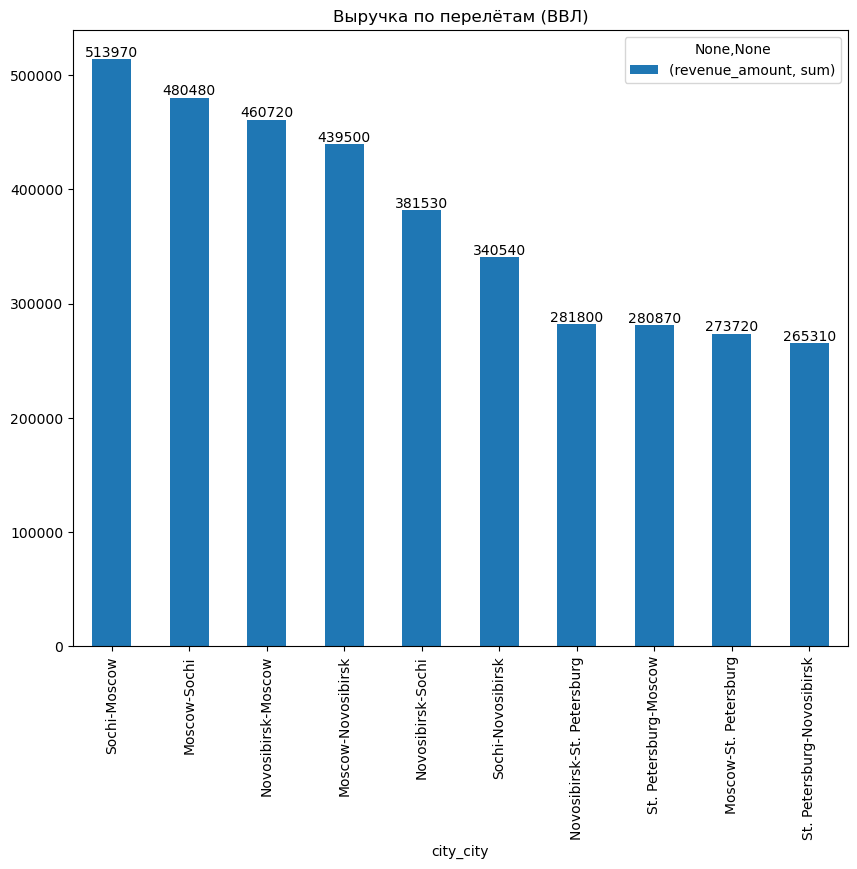

In [146]:
ax = merge_vvl.plot(kind='bar', x='city_city', y=('revenue_amount', 'sum'), figsize=(10,8))
plt.title('Выручка по перелётам (ВВЛ)')

ax.bar_label(ax.containers[0])
plt.show()

Создадим таблицу для топ-10 популярных направлений перелета (город-город) отдельно для МВЛ, сгруппированную по количеству продаж билетов (count), сумме выручки (sum) и средней цене билета (mean). И отсортируем эту таблицу по убыванию по столбцу sum. Оставим первые 10 записей.

In [147]:
merge_mvl = merge_df[merge_df['route_flight_type']=='МВЛ'].groupby('city_city').agg({'revenue_amount': ['count', 'sum', 'mean']}).sort_values(by=('revenue_amount', 'sum'), ascending=False)
merge_mvl = merge_mvl.reset_index().head(10)
merge_mvl

city_city revenue_amount                   
                                  count    sum        mean
0       Khudzhand-Moscow            144  95190  661.041667
1             Osh-Moscow            136  80920  595.000000
2             Moscow-Osh            150  67190  447.933333
3  Khudzhand-Novosibirsk            116  57740  497.758621
4       Moscow-Khudzhand            129  57710  447.364341
5        Osh-Novosibirsk            115  56980  495.478261
6    Bishkek-Novosibirsk            102  48300  473.529412
7        Novosibirsk-Osh            119  47450  398.739496
8    Novosibirsk-Bishkek            120  46980  391.500000
9         Moscow-Antalya            101  38080  377.029703

Примечание: вывели также mean. Это средняя цена билета по данному маршруту перелёта

<div class="alert alert-block alert-info">
Выручка по перелётам (для типа перелёта МВЛ):

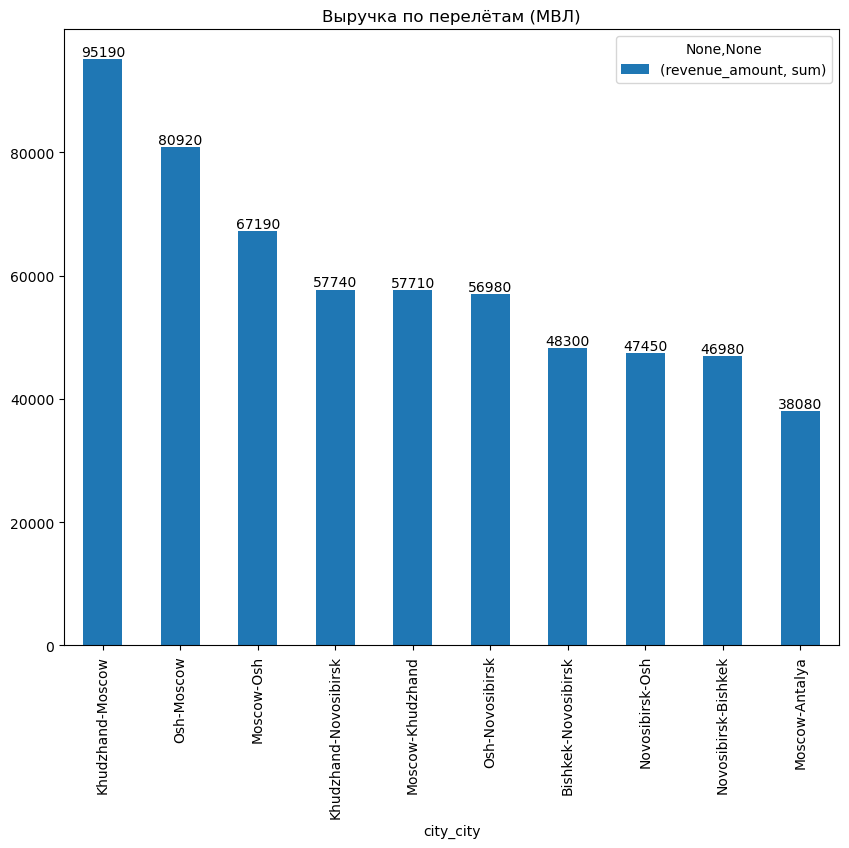

In [148]:
ax = merge_mvl.plot(kind='bar', x='city_city', y=('revenue_amount', 'sum'), figsize=(10,8))
plt.title('Выручка по перелётам (МВЛ)')

ax.bar_label(ax.containers[0])
plt.show()

- 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

In [149]:
merge_df

issue_date flight_date_loc pax_type  revenue_amount orig_city_code  \
0     2021-12-07      2022-01-11       AD             200            MOW   
1     2021-12-31      2022-01-03       AD             610            UUS   
2     2021-11-28      2022-01-04       AD             390            KGD   
3     2021-12-08      2022-01-05       AD             190            VOZ   
4     2021-12-08      2022-01-12       AD             190            MOW   
...          ...             ...      ...             ...            ...   
48315 2022-06-11      2022-06-22      CHD             480            MOW   
48316 2022-06-06      2022-06-20       AD             270            LED   
48317 2022-06-26      2022-06-29       AD             230            MOW   
48318 2022-06-26      2022-06-28       AD             270            KZN   
48319 2022-06-09      2022-06-25       AD             260            AER   

      dest_city_code route_flight_type  ffp_flag sale_type  month  season  \
0                KGD               ВВЛ         0    ONLINE     12  winter   
1                OVB               ВВЛ         0   OFFLINE     12  winter   
2                MOW               ВВЛ         1    ONLINE     11  autumn   
3                MOW               ВВЛ         0    ONLINE     12  winter   
4                KRR               ВВЛ         1   OFFLINE     12  winter   
...              ...               ...       ...       ...    ...     ...   
48315            OMS               ВВЛ         0    ONLINE      6  summer   
48316            MOW               ВВЛ         0   OFFLINE      6  summer   
48317            KZN               ВВЛ         1    ONLINE      6  summer   
48318            MOW               ВВЛ         0   OFFLINE      6  summer   
48319            MOW               ВВЛ         1    ONLINE      6  summer   

       urgency location_orig_city location_dest_city  \
0           35                MOW        Kaliningrad   
1            3  Yuzhno-sakhalinsk        Novosibirsk   
2           37        Kaliningrad                MOW   
3           28           Voronezh                MOW   
4           35                MOW          Krasnodar   
...        ...                ...                ...   
48315       11                MOW               Omsk   
48316       14     St. Petersburg                MOW   
48317        3                MOW              Kazan   
48318        2              Kazan                MOW   
48319       16              Sochi                MOW   

                           city_city  
0                 Moscow-Kaliningrad  
1      Yuzhno-sakhalinsk-Novosibirsk  
2                 Kaliningrad-Moscow  
3                    Voronezh-Moscow  
4                   Moscow-Krasnodar  
...                              ...  
48315                    Moscow-Omsk  
48316          St. Petersburg-Moscow  
48317                   Moscow-Kazan  
48318                   Kazan-Moscow  
48319                   Sochi-Moscow  

[48320 rows x 15 columns]

Преобразуем все категориальные переменные в числовые

Для этого воспользуемся методом <code>label encoding</code> из библиотеки <code>scikit-learn</code>

Проделаем сначала для категориальных переменных из столбца <code>pax_type</code>:

In [150]:
# импортируем из библиотеки для решения задач машинного обучения кодировшик
from sklearn.preprocessing import LabelEncoder 

# исходные данные
print(merge_df['pax_type'].value_counts()) 

#  кодировщик записываем в переменную
encoder =  LabelEncoder() 

# трансформируем строковые значения в числа
merge_df['pax_type'] = encoder.fit_transform(merge_df['pax_type']) 

# проверяем результат
print(merge_df['pax_type'].value_counts()) 

AD     44813
CHD     3421
INF       86
Name: pax_type, dtype: int64
0    44813
1     3421
2       86
Name: pax_type, dtype: int64


Теперь проделаем то же самое для всех столбцов с категориальными переменными

In [151]:
# Оставшиеся столбцы с категориальными переменными
columns = ['issue_date','flight_date_loc' ,'orig_city_code', 'dest_city_code', 'route_flight_type',
       'sale_type', 'season', 'city_city']
# Столбцы 'location_orig_city' и 'location_orig_city' не преобразуем, так как в них содержатся данные, аналогичные данным в столбцах 'orig_city_code' и 'dest_city_code' соответственно

In [152]:
for element in columns:
    
    print('Исходные данные\n')
    # исходные данные
    print(merge_df[element].value_counts()) 

    #  кодировщик записываем в переменную
    encoder =  LabelEncoder() 

    # трансформируем строковые значения в числа
    merge_df[element] = encoder.fit_transform(merge_df[element]) 
    print()
    
    print('Результат кодировки\n')
    # проверяем результат
    print(merge_df[element].value_counts())  
    
    print('\n\n')

Исходные данные

2021-11-12    321
2021-11-11    314
2021-11-10    312
2021-11-09    268
2021-12-15    257
             ... 
2022-05-02     43
2022-09-25     42
2022-04-30     42
2022-01-30     42
2022-09-30     36
Name: issue_date, Length: 365, dtype: int64

Результат кодировки

42     321
41     314
40     312
39     268
75     257
      ... 
213     43
359     42
211     42
121     42
364     36
Name: issue_date, Length: 365, dtype: int64



Исходные данные

2022-08-14    239
2022-08-23    238
2022-08-24    238
2022-08-12    235
2022-08-20    234
             ... 
2021-10-04     23
2021-10-02     17
2021-10-03     15
2022-10-05      2
2021-10-01      1
Name: flight_date_loc, Length: 370, dtype: int64

Результат кодировки

317    239
326    238
327    238
315    235
323    234
      ... 
3       23
1       17
2       15
369      2
0        1
Name: flight_date_loc, Length: 370, dtype: int64



Исходные данные

MOW    15651
OVB     7984
AER     2046
LED     1941
IKT     1307
       ...

In [153]:
merge_df

issue_date  flight_date_loc  pax_type  revenue_amount  orig_city_code  \
0              67              102         0             200              73   
1              91               94         0             610             135   
2              58               95         0             390              52   
3              68               96         0             190             139   
4              68              103         0             190              73   
...           ...              ...       ...             ...             ...   
48315         253              264         1             480              73   
48316         248              262         0             270              65   
48317         268              271         0             230              73   
48318         268              270         0             270              62   
48319         251              267         0             260               2   

       dest_city_code  route_flight_type  ffp_flag  sale_type  month  season  \
0                  50                  0         0          1     12       3   
1                  94                  0         0          0     12       3   
2                  73                  0         1          1     11       0   
3                  73                  0         0          1     12       3   
4                  55                  0         1          0     12       3   
...               ...                ...       ...        ...    ...     ...   
48315              92                  0         0          1      6       2   
48316              73                  0         0          0      6       2   
48317              60                  0         1          1      6       2   
48318              73                  0         0          0      6       2   
48319              73                  0         1          1      6       2   

       urgency location_orig_city location_dest_city  city_city  
0           35                MOW        Kaliningrad        260  
1            3  Yuzhno-sakhalinsk        Novosibirsk        630  
2           37        Kaliningrad                MOW        136  
3           28           Voronezh                MOW        604  
4           35                MOW          Krasnodar        266  
...        ...                ...                ...        ...  
48315       11                MOW               Omsk        293  
48316       14     St. Petersburg                MOW        530  
48317        3                MOW              Kazan        261  
48318        2              Kazan                MOW        140  
48319       16              Sochi                MOW        521  

[48320 rows x 15 columns]

Строим матрицу корреляций:

In [154]:
merge_corr = merge_df.corr()
merge_corr

issue_date  flight_date_loc  pax_type  revenue_amount  \
issue_date           1.000000         0.958649  0.011273        0.261439   
flight_date_loc      0.958649         1.000000  0.037186        0.272976   
pax_type             0.011273         0.037186  1.000000       -0.082590   
revenue_amount       0.261439         0.272976 -0.082590        1.000000   
orig_city_code       0.016464        -0.008239 -0.026811        0.019109   
dest_city_code       0.001096        -0.017614 -0.029103        0.026475   
route_flight_type   -0.112304        -0.129633  0.054045        0.101338   
ffp_flag            -0.043220        -0.035923 -0.160828       -0.051968   
sale_type           -0.011978         0.023339  0.049822       -0.166361   
month               -0.188431        -0.215946 -0.011007       -0.076588   
season               0.059240         0.067247  0.005278        0.019083   
urgency             -0.073985         0.212885  0.091603        0.058968   
city_city            0.029313         0.032927 -0.001638       -0.012898   

                   orig_city_code  dest_city_code  route_flight_type  \
issue_date               0.016464        0.001096          -0.112304   
flight_date_loc         -0.008239       -0.017614          -0.129633   
pax_type                -0.026811       -0.029103           0.054045   
revenue_amount           0.019109        0.026475           0.101338   
orig_city_code           1.000000        0.003830          -0.039253   
dest_city_code           0.003830        1.000000          -0.043439   
route_flight_type       -0.039253       -0.043439           1.000000   
ffp_flag                 0.000738        0.006447          -0.160427   
sale_type               -0.038779       -0.041427          -0.105276   
month                    0.023345        0.010805           0.074370   
season                  -0.006426       -0.008839           0.001714   
urgency                 -0.085396       -0.065485          -0.068689   
city_city                0.567822        0.088823          -0.088996   

                   ffp_flag  sale_type     month    season   urgency  \
issue_date        -0.043220  -0.011978 -0.188431  0.059240 -0.073985   
flight_date_loc   -0.035923   0.023339 -0.215946  0.067247  0.212885   
pax_type          -0.160828   0.049822 -0.011007  0.005278  0.091603   
revenue_amount    -0.051968  -0.166361 -0.076588  0.019083  0.058968   
orig_city_code     0.000738  -0.038779  0.023345 -0.006426 -0.085396   
dest_city_code     0.006447  -0.041427  0.010805 -0.008839 -0.065485   
route_flight_type -0.160427  -0.105276  0.074370  0.001714 -0.068689   
ffp_flag           1.000000   0.321580 -0.003213  0.006026  0.022505   
sale_type          0.321580   1.000000 -0.011624  0.006407  0.122910   
month             -0.003213  -0.011624  1.000000 -0.339625 -0.109783   
season             0.006026   0.006407 -0.339625  1.000000  0.032256   
urgency            0.022505   0.122910 -0.109783  0.032256  1.000000   
city_city          0.023115   0.010390 -0.019836  0.000289  0.014745   

                   city_city  
issue_date          0.029313  
flight_date_loc     0.032927  
pax_type           -0.001638  
revenue_amount     -0.012898  
orig_city_code      0.567822  
dest_city_code      0.088823  
route_flight_type  -0.088996  
ffp_flag            0.023115  
sale_type           0.010390  
month              -0.019836  
season              0.000289  
urgency             0.014745  
city_city           1.000000

<AxesSubplot:>

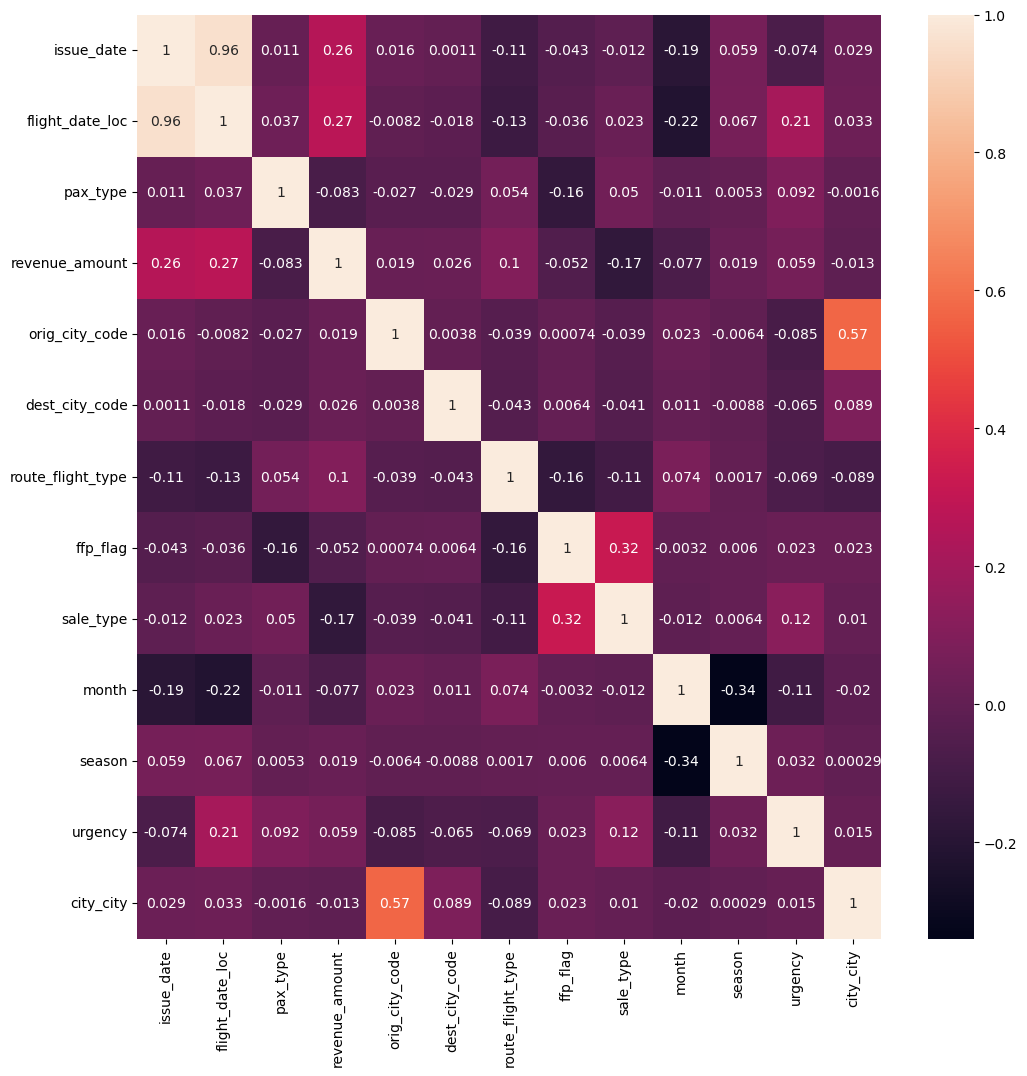

In [155]:
plt.figure(figsize=(12, 12))
sns.heatmap(merge_corr, annot=True)

<div class="alert alert-block alert-info">
Практически ни с чем остальным выручка не имеет связи (линейной, по крайней мере), либо она слабая.